# Marketing Insights for E-Commerce Company

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import os
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import permutations,combinations
from collections import Counter

#Import packages for clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

#Center and scale the data
from sklearn.preprocessing import StandardScaler

#Statsmodel and Sklearn Packages for Classification Model
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE,SelectKBest,f_classif
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
os.chdir(r'C:\Users\Hp\Downloads\14. Final Capstone Project - Marketing Insights for E-Commerce Company\Datasets')

In [4]:
cust_data=pd.read_excel('CustomersData.xlsx')
cust_data

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49
...,...,...,...,...
1463,14438,F,New York,41
1464,12956,F,Chicago,48
1465,15781,M,New Jersey,19
1466,14410,F,New York,45


In [5]:
dis_coup=pd.read_csv('Discount_Coupon.csv')
dis_coup

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [6]:
dis_coup.columns=['Month', 'Product_Category', 'Coupon_Code', 'Discount_pct']

In [7]:
mark_spend=pd.read_csv('Marketing_Spend.csv')
mark_spend

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30
...,...,...,...
360,12/27/2019,4000,3396.87
361,12/28/2019,4000,3246.84
362,12/29/2019,4000,2546.58
363,12/30/2019,4000,674.31


In [8]:
mark_spend.Date=pd.to_datetime(mark_spend.Date, infer_datetime_format= True)

In [9]:
on_sales=pd.read_csv('Online_Sales.csv')
on_sales

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
1,17850,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
2,17850,16681,20190101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used
3,17850,16682,20190101,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used
4,17850,16682,20190101,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,20191231,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked
52920,14410,48494,20191231,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used
52921,14410,48495,20191231,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used
52922,14600,48496,20191231,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked


In [10]:
tax=pd.read_excel('Tax_amount.xlsx')
tax

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


### 1. Calculate Invoice amount or sale_amount or revenue for each transaction and Item level

Invoice value = ((Qty * Avg Price) * (1-discount_pct) * (1+GST)) + Deliver Charges

In [11]:
cust_sales=pd.merge(left=on_sales,right=cust_data,how='inner',on='CustomerID')

In [12]:
cust_sales_tax=pd.merge(left=cust_sales,right=tax,how='inner',on='Product_Category')

In [13]:
df_final=pd.merge(left=cust_sales_tax,right=dis_coup,how='inner',on='Product_Category')
df_final

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,GST,Month,Coupon_Code,Discount_pct
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,0.10,Jan,ELEC10,10
1,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,0.10,Feb,ELEC20,20
2,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,0.10,Mar,ELEC30,30
3,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,0.10,Apr,ELEC10,10
4,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,0.10,May,ELEC20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,12842,47997,20191223,GGOEGGCX056399,Gift Card - $250.00,Gift Cards,1,254.82,0.0,Used,F,New Jersey,27,0.05,Aug,GC20,20
630284,12842,47997,20191223,GGOEGGCX056399,Gift Card - $250.00,Gift Cards,1,254.82,0.0,Used,F,New Jersey,27,0.05,Sep,GC30,30
630285,12842,47997,20191223,GGOEGGCX056399,Gift Card - $250.00,Gift Cards,1,254.82,0.0,Used,F,New Jersey,27,0.05,Oct,GC10,10
630286,12842,47997,20191223,GGOEGGCX056399,Gift Card - $250.00,Gift Cards,1,254.82,0.0,Used,F,New Jersey,27,0.05,Nov,GC20,20


In [14]:
df_final['Invoice_Value']=abs(((df_final.Quantity * df_final.Avg_Price) * (1-df_final.Discount_pct) * (1+df_final.GST)) + df_final.Delivery_Charges)

In [15]:
df_final.Invoice_Value

0         1515.229
1         3206.039
2         4896.849
3         1515.229
4         3206.039
            ...   
630283    5083.659
630284    7759.269
630285    2408.049
630286    5083.659
630287    7759.269
Name: Invoice_Value, Length: 630288, dtype: float64

### Detailed Exploratory Analysis

#### a] Understanding how many customers acquired every month

In [16]:
df_final.Transaction_Date=pd.to_datetime(df_final.Transaction_Date,format='%Y%m%d')

In [17]:
df_final['year_month']=df_final.Transaction_Date.map(lambda x: x.strftime('%Y-%m'))

In [22]:
#Customer Count Month Wise!
cust_month=df_final.drop_duplicates(subset = ['CustomerID'], keep = 'first').groupby(by='year_month')['CustomerID'].nunique().reset_index()
cust_month

,year_month,CustomerID
0,2019-01,200
1,2019-02,89
2,2019-03,159
3,2019-04,155
4,2019-05,109
5,2019-06,138
6,2019-07,96
7,2019-08,144
8,2019-09,88
9,2019-10,96


<AxesSubplot:>

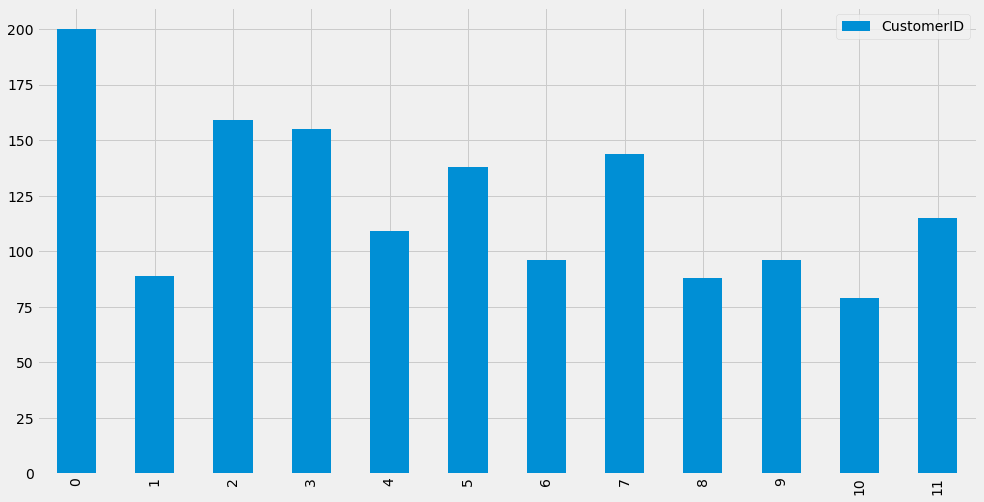

In [23]:
cust_month.plot(kind="bar",figsize=(15,8))

#### b] Understand the Retention of Customers on month on month basis

In [38]:
#Grouping CustomerID and Year_Month with Transaction Count for Understanding Customers Retention Month Wise! 
user_purchase=df_final.groupby(['CustomerID','year_month'])['Transaction_ID'].count().reset_index()
user_purchase

,CustomerID,year_month,Transaction_ID
0,12346,2019-09,24
1,12347,2019-03,360
2,12347,2019-11,348
3,12348,2019-06,204
4,12348,2019-10,72
...,...,...,...
2572,18269,2019-04,84
2573,18269,2019-06,12
2574,18277,2019-10,12
2575,18283,2019-07,672


In [39]:
#Month wise Customer's Retention!
retention=pd.crosstab(user_purchase['CustomerID'], user_purchase['year_month']).reset_index()
retention

year_month,CustomerID,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,12346,0,0,0,0,0,0,0,0,1,0,0,0
1,12347,0,0,1,0,0,0,0,0,0,0,1,0
2,12348,0,0,0,0,0,1,0,0,0,1,0,0
3,12350,0,0,0,0,0,0,0,0,0,0,0,1
4,12356,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,18259,0,0,0,1,0,0,0,0,0,0,0,0
1464,18260,0,0,0,0,0,1,0,1,0,1,0,0
1465,18269,0,0,0,1,0,1,0,0,0,0,0,0
1466,18277,0,0,0,0,0,0,0,0,0,1,0,0


In [134]:
retention.columns[1:]

Index(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12'],
      dtype='object', name='year_month')

In [141]:
months=retention.columns[1:] #Storing Months
retention_array = []
for i in range(len(months)-1):#Creating Loop with 11 months as 1st month cannot have Retention
        retention_data = {}
        selected_month = months[i+1]#Adding 1 month for Current Month
        prev_month = months[i]#Previous Month
        retention_data['month_of_year'] =selected_month
        retention_data['Total_User_Count'] = retention[selected_month].sum()#Calculating No_of_Customers
        retention_data['Retained_User_Count'] = retention[(retention[selected_month]>0) & (retention[prev_month]>0)][selected_month].sum()
        retention_array.append(retention_data)

In [136]:
#Understanding Customers who have visited in current month and previous month!
retention[(retention[selected_month]>0) & (retention[prev_month]>0)]

year_month,CustomerID,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
28,12437,0,0,0,0,0,0,0,1,0,0,1,1
77,12626,0,0,0,0,0,0,0,0,1,1,1,1
142,12853,0,0,0,0,0,0,0,0,0,0,1,1
193,13050,0,0,1,0,1,1,1,0,0,1,1,1
202,13089,0,1,1,0,1,1,1,1,1,1,1,1
223,13141,0,0,0,0,0,0,0,0,0,0,1,1
299,13506,0,1,0,0,0,0,0,0,0,0,1,1
334,13694,1,0,0,0,0,1,1,1,0,0,1,1
353,13777,1,0,0,1,0,0,1,1,0,0,1,1
355,13784,0,0,0,0,0,0,0,1,0,0,1,1


In [137]:
retention1 = pd.DataFrame(retention_array)
retention1['Retention_Rate'] = retention1['Retained_User_Count']/retention1['Total_User_Count']*100

In [138]:
retention1

,month_of_year,Total_User_Count,Retained_User_Count,Retention_Rate
0,2019-02,109,13,11.926606
1,2019-03,208,11,5.288462
2,2019-04,224,24,10.714286
3,2019-05,200,25,12.500000
4,2019-06,259,37,14.285714
5,2019-07,235,58,24.680851
6,2019-08,300,64,21.333333
7,2019-09,193,44,22.797927
8,2019-10,210,29,13.809524
9,2019-11,188,31,16.489362


#### c] How the Revenues from Existing/New Customers month on month basis?

In [44]:
#Calculating Customers first Purchase Date Month wise!
min_purchase = df_final.groupby('CustomerID').year_month.min().reset_index()
min_purchase.columns = ['CustomerID','MinPurchaseDate']

In [45]:
min_purchase

,CustomerID,MinPurchaseDate
0,12346,2019-09
1,12347,2019-03
2,12348,2019-06
3,12350,2019-12
4,12356,2019-09
...,...,...
1463,18259,2019-04
1464,18260,2019-06
1465,18269,2019-04
1466,18277,2019-10


In [46]:
#Merging the table with Transaction Table!
revenue_cust=pd.merge(df_final, min_purchase, on='CustomerID')

In [47]:
#Segregatiing New and Existing Customer!
revenue_cust['User_Type'] = 'New'
revenue_cust.loc[revenue_cust['year_month']>revenue_cust['MinPurchaseDate'],'User_Type']= 'Existing'

In [48]:
new_exs=pd.pivot_table(data=revenue_cust,index='year_month',columns='User_Type',values='Invoice_Value',aggfunc='sum').round(1)
new_exs

User_Type,Existing,New
year_month,,
2019-01,NaN,101071549.8
2019-02,9882639.9,68179121.2
2019-03,13338078.8,74427568.5
2019-04,42401988.5,58705311.5
2019-05,27741134.1,49545561.5
2019-06,32588725.1,48418341.8
2019-07,56078232.3,37531615.5
2019-08,52109895.3,48369906.4
2019-09,53710998.7,36771104.4


#### d] How the Discounts playing role in the Revenues?

In [150]:
role=pd.pivot_table(df_final,index=['Month','Discount_pct'],values='Invoice_Value',aggfunc='sum').round(1)
role

,,Invoice_Value
Month,Discount_pct,
Apr,10,45862520.2
Aug,20,97398073.8
Dec,30,148941138.9
Feb,20,97398073.8
Jan,10,45862520.2
Jul,10,45862520.2
Jun,30,148941138.9
Mar,30,148941138.9
May,20,97398073.8


<AxesSubplot:xlabel='Month,Discount_pct'>

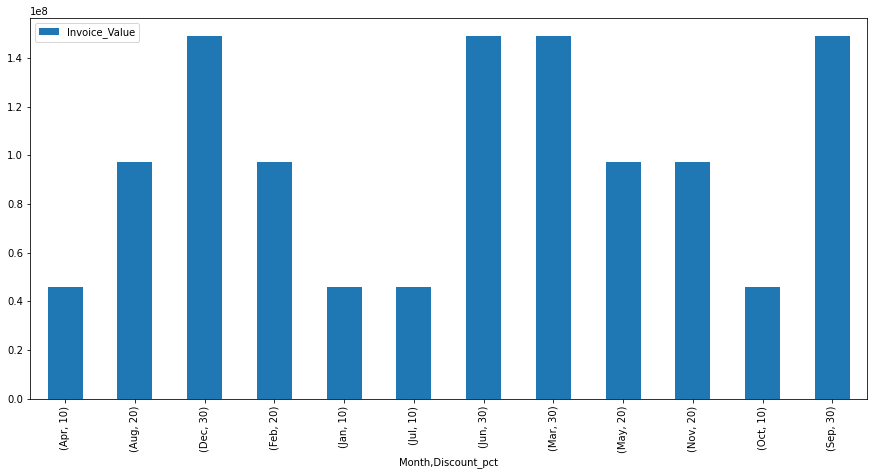

In [154]:
role.plot(kind='bar',figsize=(15,7))

#### e] Analyze KPI's like Revenue, No.of Orders, Average Order Value, Number of Customers(New/Existing),Quantity by Category, by month, by week, by day etc.

##### KPI Revenue by Month, WEEK, Day

In [229]:
kpi_revenue=pd.pivot_table(data=df_final,index='year_month',values='Invoice_Value',aggfunc='sum').round(1)
kpi_revenue

,Invoice_Value
year_month,
2019-01,101071549.8
2019-02,78061761.1
2019-03,87765647.3
2019-04,101107300.0
2019-05,77286695.6
2019-06,81007067.0
2019-07,93609847.8
2019-08,100479801.8
2019-09,90482103.1


<AxesSubplot:xlabel='year_month'>

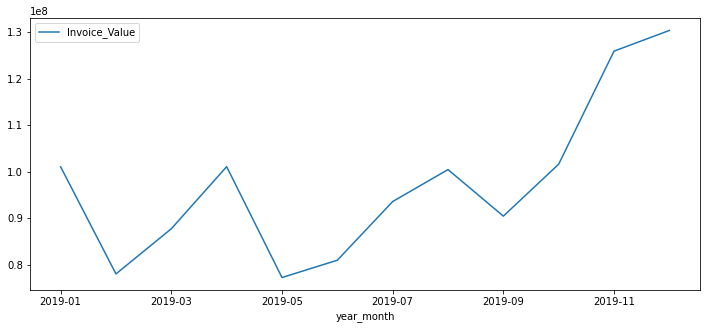

In [181]:
kpi_revenue.plot(kind='line',figsize=(12,5))

In [220]:
kpi_revenue_week=pd.pivot_table(data=df_final,index=pd.DatetimeIndex(df_final.Transaction_Date).week,
               values='Invoice_Value',aggfunc='sum').round(1)

C:\Users\Hp\AppData\Local\Temp\ipykernel_7404\823607981.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  kpi_revenue_week=pd.pivot_table(data=df_final,index=pd.DatetimeIndex(df_final.Transaction_Date).week,


In [221]:
kpi_revenue_week

,Invoice_Value
Transaction_Date,
1,27824847.0
2,21045967.0
3,22416398.5
4,21810358.0
5,21582653.7
6,19203314.7
7,21595339.1
8,18895582.6
9,18438047.8


<AxesSubplot:xlabel='Transaction_Date'>

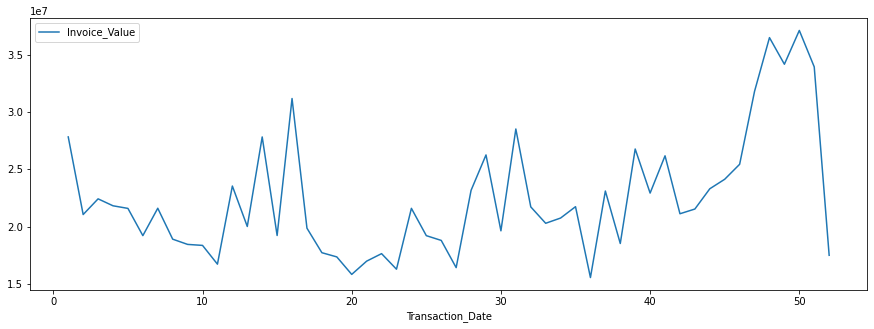

In [223]:
kpi_revenue_week.plot(kind='line',figsize=(15,5))

In [234]:
kpi_revenue_day=pd.pivot_table(data=df_final,index=pd.DatetimeIndex(df_final.Transaction_Date).day,
               values='Invoice_Value',aggfunc='sum').round(1)
kpi_revenue_day

,Invoice_Value
Transaction_Date,
1,36815626.0
2,36272148.8
3,34622318.0
4,34008269.6
5,46114574.0
6,39705042.4
7,38905339.0
8,33755914.9
9,35155803.4


<AxesSubplot:xlabel='Transaction_Date'>

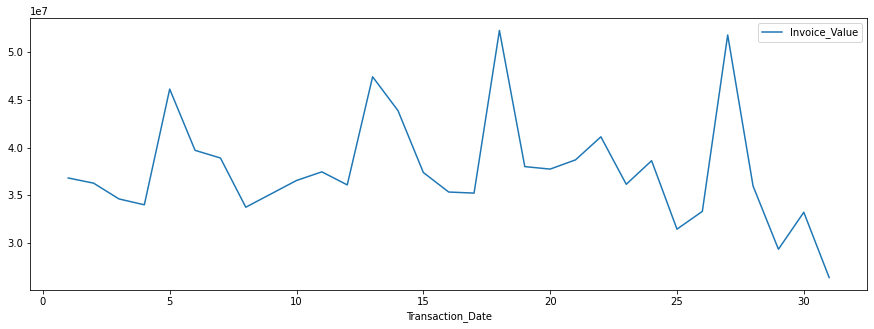

In [236]:
kpi_revenue_day.plot(kind='line',figsize=(15,5))

##### KPI Average Order Value by Month, WEEK, Day

In [257]:
kpi_aov=pd.pivot_table(data=df1,index='year_month',values='Average_OV',aggfunc='sum').round(1)
kpi_aov

,Average_OV
year_month,
2019-01,28737058.8
2019-02,11366668.3
2019-03,20577849.8
2019-04,22832818.0
2019-05,15615166.9
2019-06,21960691.1
2019-07,16855451.3
2019-08,23046547.2
2019-09,20656050.7


<AxesSubplot:ylabel='year_month'>

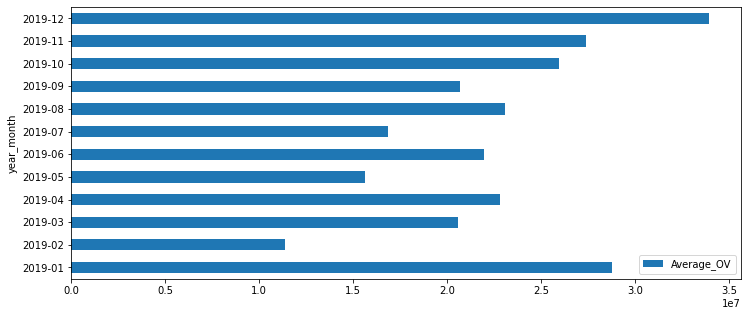

In [258]:
kpi_aov.plot(kind='barh',figsize=(12,5))

In [268]:
kpi_aov_week=pd.pivot_table(data=df1,index=pd.DatetimeIndex(df1.Transaction_Date).week,values='Average_OV',aggfunc='sum').round(1)
kpi_aov_week

C:\Users\Hp\AppData\Local\Temp\ipykernel_780\641800001.py:1: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



,Average_OV
Transaction_Date,
1,7375280.7
2,5930823.3
3,6671745.6
4,5482291.6
5,7211375.8
6,3217323.2
7,3259024.6
8,1873921.6
9,2492528.1


<AxesSubplot:xlabel='Transaction_Date'>

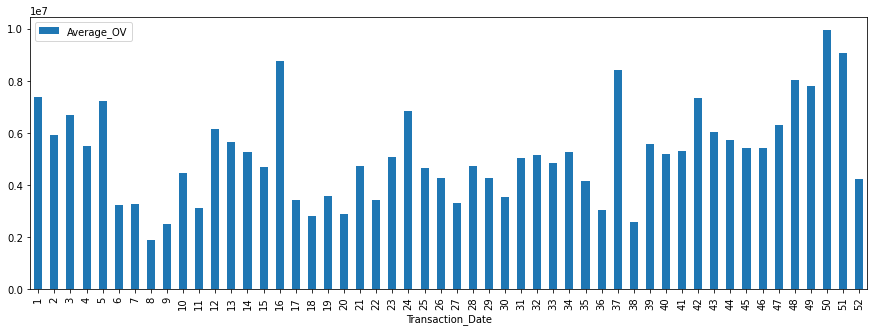

In [269]:
kpi_aov_week.plot(kind='bar',figsize=(15,5))

In [271]:
kpi_aov_day=pd.pivot_table(data=df1,index=pd.DatetimeIndex(df1.Transaction_Date).day,values='Average_OV',aggfunc='sum').round(1)
kpi_aov_day

,Average_OV
Transaction_Date,
1,7461833.9
2,7414573.8
3,6816673.2
4,7469811.2
5,8706345.1
6,8459551.3
7,9310939.2
8,7017209.2
9,7815204.8


<AxesSubplot:xlabel='Transaction_Date'>

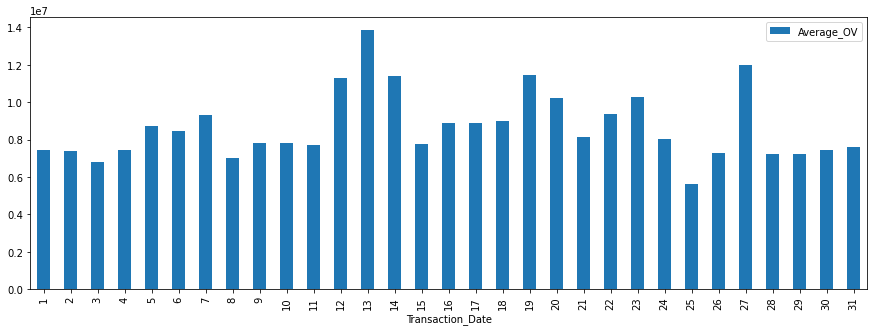

In [272]:
kpi_aov_day.plot(kind='bar',figsize=(15,5))

##### KPI Quantity by Month, WEEK, Day

In [241]:
kpi_quant=pd.pivot_table(data=df_final,index='year_month',values='Quantity',aggfunc='sum').round(1)
kpi_quant

,Quantity
year_month,
2019-01,239844
2019-02,196920
2019-03,246516
2019-04,299064
2019-05,222228
2019-06,257784
2019-07,271356
2019-08,328548
2019-09,231948


<AxesSubplot:xlabel='year_month'>

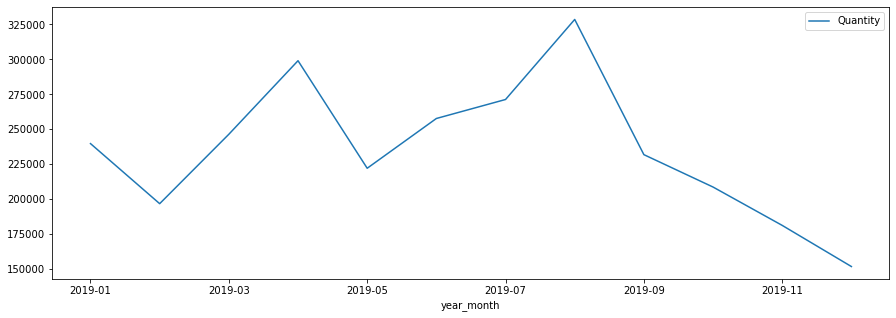

In [243]:
kpi_quant.plot(figsize=(15,5))

In [244]:
kpi_quant_week=pd.pivot_table(data=df_final,index=pd.DatetimeIndex(df_final.Transaction_Date).week,values='Quantity',aggfunc='sum')
kpi_quant_week

C:\Users\Hp\AppData\Local\Temp\ipykernel_7404\2519441885.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  kpi_quant_week=pd.pivot_table(data=df_final,index=pd.DatetimeIndex(df_final.Transaction_Date).week,values='Quantity',aggfunc='sum')


,Quantity
Transaction_Date,
1,71244
2,55656
3,51732
4,36492
5,50712
6,43740
7,62688
8,43092
9,43416


<AxesSubplot:xlabel='Transaction_Date'>

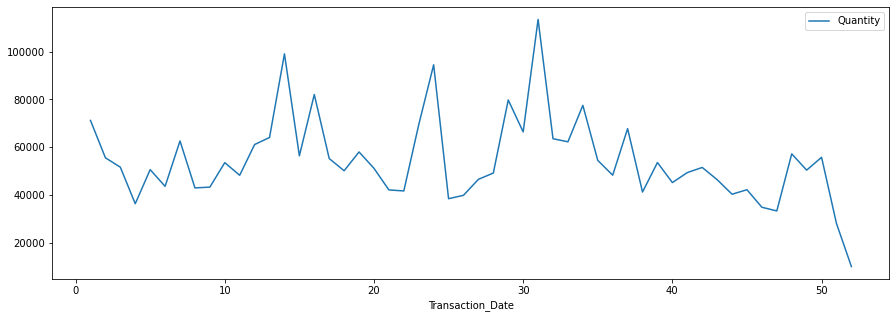

In [245]:
kpi_quant_week.plot(figsize=(15,5))

In [246]:
kpi_quant_day=pd.pivot_table(data=df_final,index=pd.DatetimeIndex(df_final.Transaction_Date).day,values='Quantity',aggfunc='sum')
kpi_quant_day

,Quantity
Transaction_Date,
1,85896
2,90624
3,78144
4,82932
5,157104
6,97380
7,97764
8,95316
9,87624


<AxesSubplot:xlabel='Transaction_Date'>

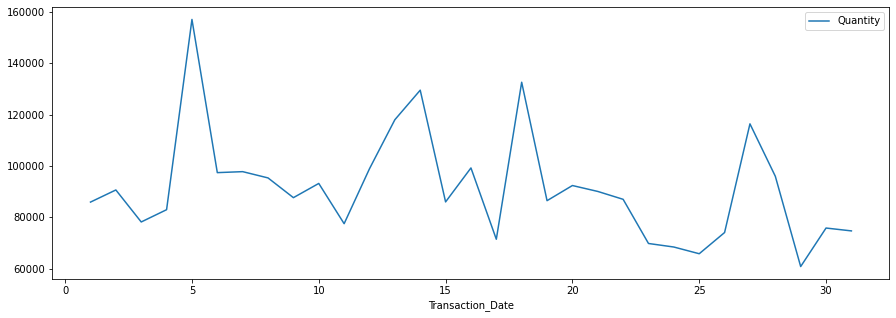

In [247]:
kpi_quant_day.plot(figsize=(15,5))

##### KPI New/Existing Customers by Month, WEEK, Day

In [49]:
pd.DataFrame(revenue_cust.User_Type.value_counts())

,User_Type
New,381252
Existing,249036


<AxesSubplot:>

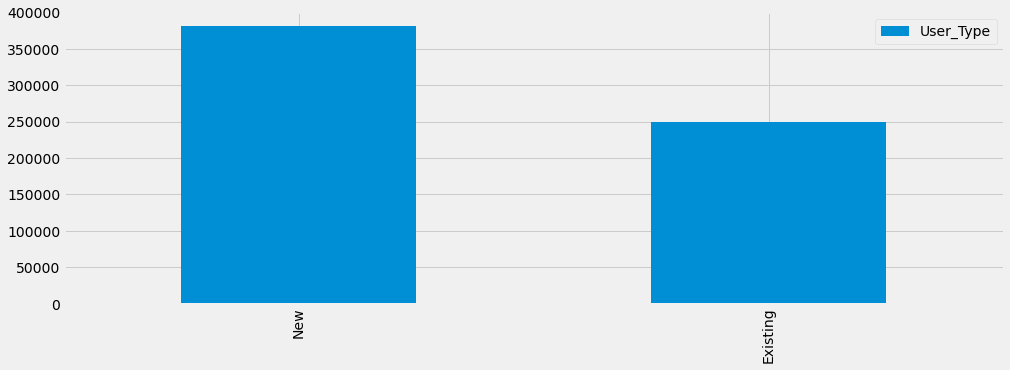

In [51]:
fig=(pd.DataFrame(revenue_cust.User_Type.value_counts()))
fig.plot(kind='bar',figsize=(15,5))

In [48]:
pd.DataFrame(revenue_cust.groupby([pd.DatetimeIndex(revenue_cust.Transaction_Date).week,'User_Type'])['User_Type'].count())

C:\Users\Hp\AppData\Local\Temp\ipykernel_780\1404066364.py:1: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



User_Type
Transaction_Date User_Type           
1                Existing         432
                 New            12096
2                New             9864
3                New            10032
4                New            11208
...                               ...
50               New             7848
51               Existing        7296
                 New             7284
52               Existing        4200
                 New             1944

[100 rows x 1 columns]

C:\Users\Hp\AppData\Local\Temp\ipykernel_780\3977310921.py:1: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



<AxesSubplot:xlabel='Transaction_Date,User_Type'>

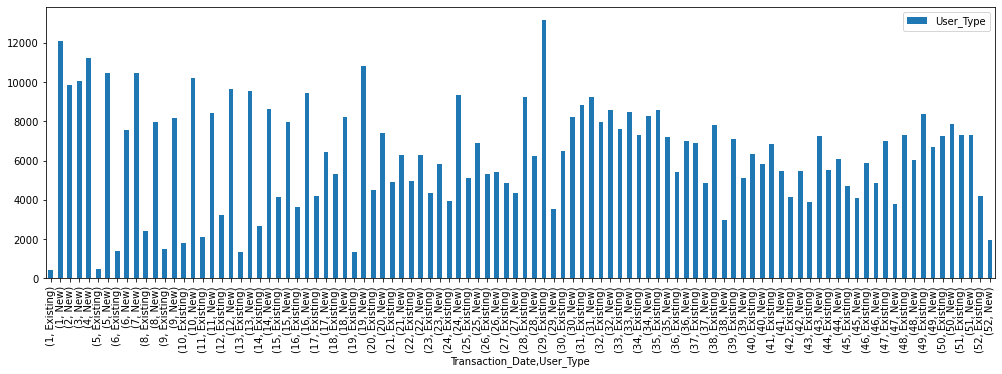

In [62]:
#Week wise Count of New/Existing Customers!
pd.DataFrame(revenue_cust.groupby([pd.DatetimeIndex(revenue_cust.Transaction_Date).week,'User_Type'])['User_Type'].count()).plot(kind='bar',figsize=(17,5))

In [63]:
#Day Wise Count of New/Existing Customers!
pd.DataFrame(revenue_cust.groupby([pd.DatetimeIndex(revenue_cust.Transaction_Date).day,'User_Type'])['User_Type'].count())

User_Type
Transaction_Date User_Type           
1                Existing        8604
                 New            11940
2                Existing        6576
                 New            12480
3                Existing        4728
...                               ...
29               New             7224
30               Existing        8460
                 New            10884
31               Existing        6936
                 New             7956

[62 rows x 1 columns]

<AxesSubplot:xlabel='Transaction_Date,User_Type'>

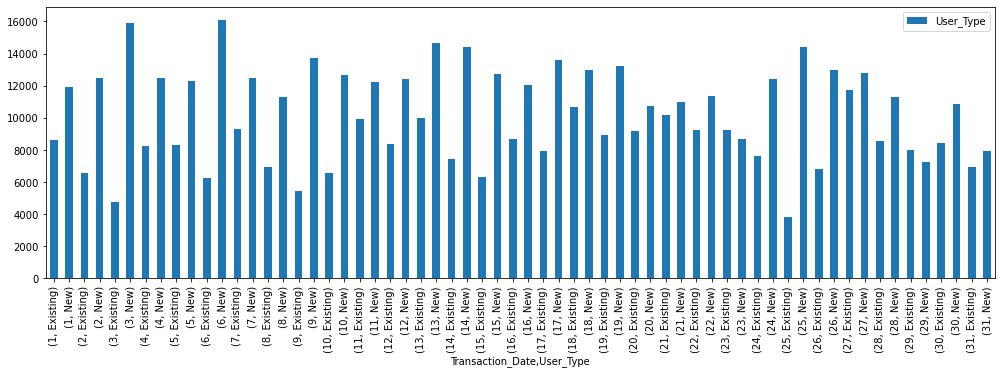

In [64]:
pd.DataFrame(revenue_cust.groupby([pd.DatetimeIndex(revenue_cust.Transaction_Date).day,'User_Type'])['User_Type'].count()).plot(kind='bar',figsize=(17,5))

#### e] Understand the Trend/Seasonality of sales by category, location etc.

In [25]:
#Understanding Trend/Seasonality of Sales by Location!
ts_bar=pd.pivot_table(data=df_final,index='year_month',columns='Location',values='Invoice_Value',aggfunc='sum').round(1)
ts_bar

Location,California,Chicago,New Jersey,New York,Washington DC
year_month,,,,,
2019-01,37385115.6,27657375.2,7900571.4,19683459.3,8445028.3
2019-02,22609422.4,27000019.3,7623493.2,11076356.3,9752469.9
2019-03,24948863.6,29464388.9,4892079.0,24530616.0,3929699.7
2019-04,30421831.7,38598433.9,11116705.9,16070033.9,4900294.6
2019-05,21746430.8,27341553.7,7212919.4,19393706.1,1592085.5
2019-06,25272944.0,25409999.6,10127500.7,17331675.8,2864946.9
2019-07,30164063.7,32771807.6,5387752.4,20499104.4,4787119.6
2019-08,29595610.8,39948558.4,5712373.5,20231683.3,4991575.7
2019-09,29095135.4,34175662.7,6710430.8,14688857.3,5812016.8


<AxesSubplot:xlabel='year_month'>

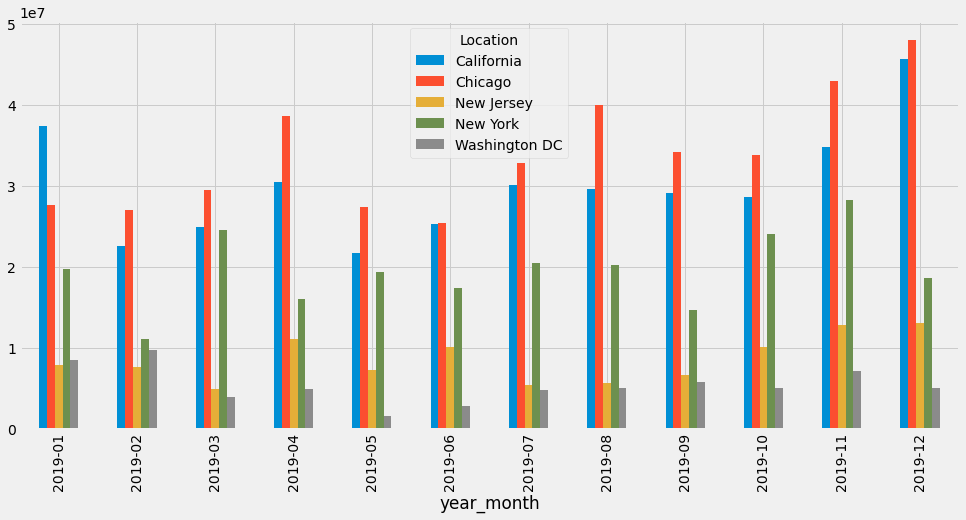

In [27]:
ts_bar.plot(kind='bar',figsize=(15,7))

<AxesSubplot:xlabel='year_month'>

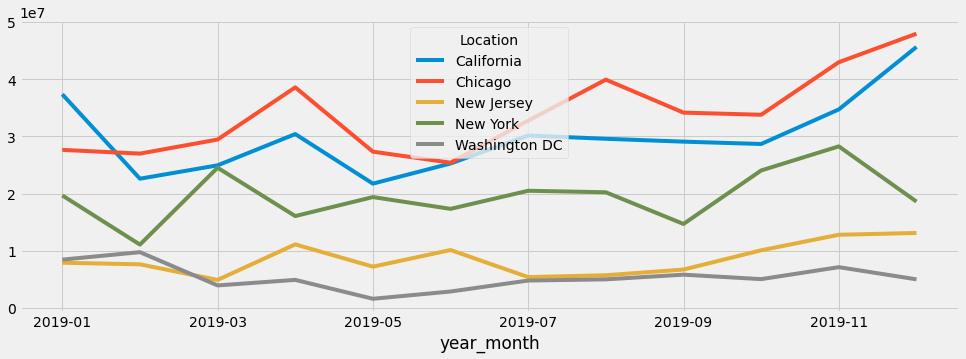

In [28]:
ts_bar.plot(kind='line',figsize=(15,5))

In [29]:
#Understanding Trend/Seasonality of Sales by Product Category!
ts_bar_pc=pd.pivot_table(data=df_final,index='year_month',columns='Product_Category',values='Invoice_Value',aggfunc='sum').round(1)
ts_bar_pc

Product_Category,Accessories,Android,Apparel,Bags,Bottles,Drinkware,Gift Cards,Headgear,Housewares,Lifestyle,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
year_month,,,,,,,,,,,,,,,,
2019-01,12855.8,18307.4,10118103.8,2897809.9,134719.8,3874796.7,67915.4,484055.4,229572.9,1445891.3,NaN,2400448.7,71191546.0,1414200.5,6669504.5,111821.8
2019-02,NaN,4935.5,10062143.6,4785102.1,86937.3,3792179.6,95760.0,1086888.7,26647.6,1754831.2,NaN,992753.4,49115147.2,1044895.8,5160570.7,52968.5
2019-03,14967.5,27559.8,15684677.6,3735834.3,123448.9,5622718.1,89775.0,738085.4,117777.6,1725126.6,NaN,1906668.0,49986262.2,969811.4,6809557.0,213377.8
2019-04,41573.6,9871.0,23546481.9,3042036.9,113993.2,7244965.7,173565.0,2910841.4,21120.8,2329889.8,NaN,1406928.0,45610929.7,5433482.2,9056059.6,165561.2
2019-05,34800.0,22701.1,15647773.9,2659960.9,252808.9,4378058.7,317205.0,717263.1,125781.1,1519022.7,NaN,947212.2,43441351.4,1412635.6,5673507.5,136613.4
2019-06,51426.8,42464.5,12186834.5,3445004.3,132431.0,4708879.6,287280.0,306746.6,89463.1,1606984.9,NaN,2317251.0,48918136.7,1156063.6,5626975.0,131125.3
2019-07,465682.2,28494.2,17367550.9,3186664.1,238427.0,3186515.8,119700.0,478258.3,322626.6,2486384.5,NaN,1943224.3,52319485.7,5518593.1,5900168.6,48072.4
2019-08,80114.9,19592.6,14047145.6,4348122.3,74927.6,5953741.8,179550.0,5108956.4,223274.8,1903006.9,4947663.4,1238954.4,49204578.1,6444545.8,6560098.4,145528.7
2019-09,316138.6,NaN,14811137.9,2467255.5,360468.0,4937426.7,143640.0,270225.2,3281.3,1850057.5,16794461.5,863443.2,42315266.2,1816294.6,3459106.6,73900.2


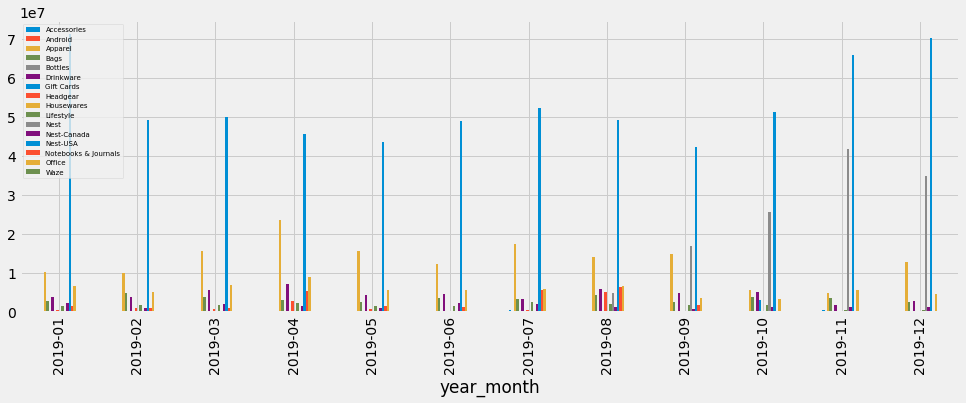

In [35]:
ts_bar_pc.plot(kind='bar',figsize=(15,5))
plt.legend(loc=2, prop={'size': 7})

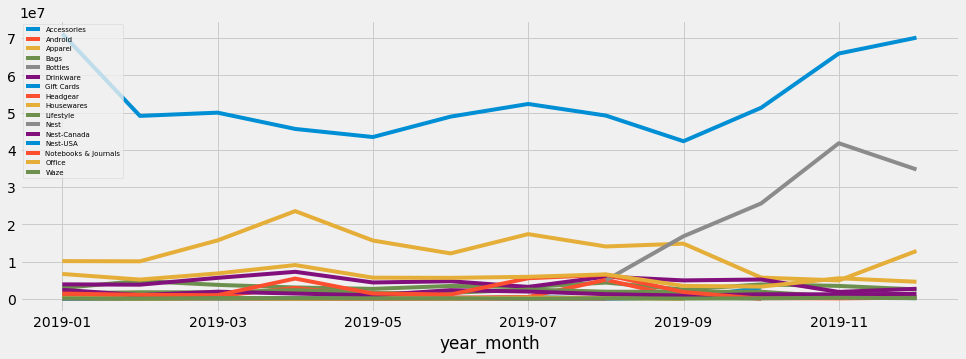

In [36]:
ts_bar_pc.plot(kind='line',figsize=(15,5))
plt.legend(loc=2, prop={'size': 7})

#### f] How number order varies and sales with different days?

In [37]:
order_sales=pd.pivot_table(data=df_final,index=pd.DatetimeIndex(df_final.Transaction_Date).weekday,values='Quantity',aggfunc='sum')
order_sales

,Quantity
Transaction_Date,
0,143028
1,134556
2,476220
3,528468
4,622728
5,453732
6,477672


<AxesSubplot:xlabel='Transaction_Date'>

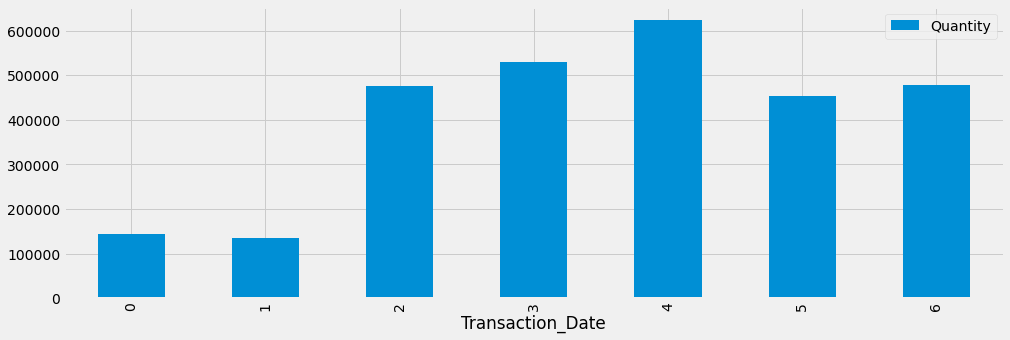

In [38]:
order_sales.plot(kind='bar',figsize=(15,5))

In [40]:
sales_order=pd.pivot_table(data=df_final,index=pd.DatetimeIndex(df_final.Transaction_Date).weekday,values='Invoice_Value',aggfunc='sum').round(1)
sales_order

,Invoice_Value
Transaction_Date,
0,91169994.2
1,98864379.8
2,206868716.1
3,209707129.0
4,218386515.5
5,168917966.9
6,174892229.9


<AxesSubplot:xlabel='Transaction_Date'>

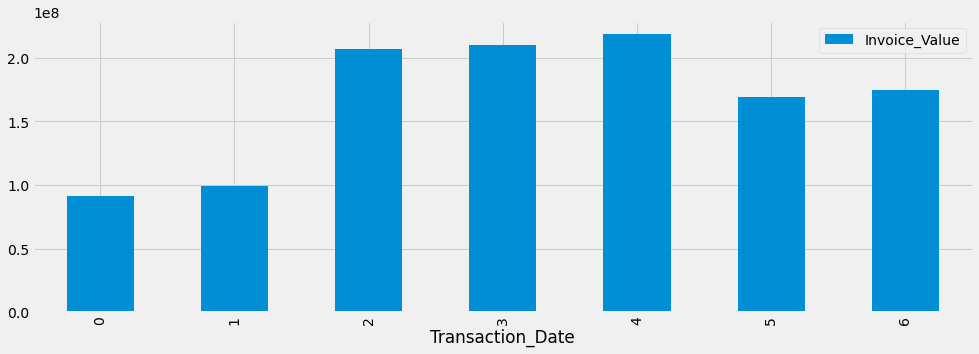

In [41]:
sales_order.plot(kind='bar',figsize=(15,5))

#### g] Calculate Revenue, Marketing Spend, percentage of marketting spend out of revenue,Tax, percentage of delivery charges by month.

In [117]:
#Merging the Marketting Table!
df=pd.merge(left=df_final,right=mark_spend,left_on='Transaction_Date',right_on='Date')
df

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Tenure_Months,GST,Month,Coupon_Code,Discount_pct,Invoice_Value,year_month,Date,Offline_Spend,Online_Spend
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,12,0.10,Jan,ELEC10,10,1515.229,2019-01,2019-01-01,4500,2424.50
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,12,0.10,Feb,ELEC20,20,3206.039,2019-01,2019-01-01,4500,2424.50
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,12,0.10,Mar,ELEC30,30,4896.849,2019-01,2019-01-01,4500,2424.50
3,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,12,0.10,Apr,ELEC10,10,1515.229,2019-01,2019-01-01,4500,2424.50
4,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,12,0.10,May,ELEC20,20,3206.039,2019-01,2019-01-01,4500,2424.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,14502,44696,2019-11-26,GGOENEBQ092399,Nest Cam IQ Outdoor - USA (Preorder),Nest,3,279.00,6.5,Clicked,...,22,0.05,Aug,NE20,20,16691.650,2019-11,2019-11-26,3000,1642.31
630284,14502,44696,2019-11-26,GGOENEBQ092399,Nest Cam IQ Outdoor - USA (Preorder),Nest,3,279.00,6.5,Clicked,...,22,0.05,Sep,NE30,30,25480.150,2019-11,2019-11-26,3000,1642.31
630285,14502,44696,2019-11-26,GGOENEBQ092399,Nest Cam IQ Outdoor - USA (Preorder),Nest,3,279.00,6.5,Clicked,...,22,0.05,Oct,NE10,10,7903.150,2019-11,2019-11-26,3000,1642.31
630286,14502,44696,2019-11-26,GGOENEBQ092399,Nest Cam IQ Outdoor - USA (Preorder),Nest,3,279.00,6.5,Clicked,...,22,0.05,Nov,NE20,20,16691.650,2019-11,2019-11-26,3000,1642.31


In [118]:
#Transaction Per Customer!
tpc=pd.DataFrame(df.groupby('CustomerID')['Transaction_ID'].count())

In [119]:
tpc.columns=['Tpc']
tpc

,Tpc
CustomerID,
12346,24
12347,708
12348,276
12350,204
12356,432
...,...
18259,72
18260,468
18269,96


In [120]:
#Merging the TPC with Transaction Table!
df1=pd.merge(left=df,right=tpc,how='inner',on='CustomerID')

In [121]:
#Calculation of Average Order Value!
df1['Average_OV']=df1.Invoice_Value/df1.Tpc*100

In [122]:
#Calculating Marketing Spend by adding both Offline and Online Marketing Spend!
df1['Marketing_spend']=df1.Offline_Spend+df1.Online_Spend

In [127]:
#Calculating Percentage of Marketing Spend for Month Wise!
df1['perc_of_ms_rev']=df1.Marketing_spend/sum(df1.Marketing_spend)*100

In [131]:
#Percent of Delivery Charges per Month!
perc_dc=pd.pivot_table(data=df1,index=pd.DatetimeIndex(df1.Transaction_Date).month,values='Delivery_Charges',aggfunc='sum')/6603478.2*100

In [140]:
metrics=pd.pivot_table(data=df1,index='year_month',values=['Invoice_Value','Marketing_spend','perc_of_ms_rev'],aggfunc='sum').round(1)

In [141]:
perc_dc.index=['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12']

In [142]:
metrics.join(perc_dc)

,Invoice_Value,Marketing_spend,perc_of_ms_rev,Delivery_Charges
year_month,,,,
2019-01,101071549.8,238239627.5,8.0,10.612907
2019-02,78061761.1,187981993.1,6.3,8.805229
2019-03,87765647.3,206915609.8,6.9,10.780553
2019-04,101107300.0,256590770.0,8.6,7.437858
2019-05,77286695.6,207702582.5,7.0,7.404460
2019-06,81007067.0,221677037.4,7.4,6.733877
2019-07,93609847.8,244903629.0,8.2,8.727061
2019-08,100479801.8,338599109.6,11.4,11.011470
2019-09,90482103.1,230257458.4,7.7,7.407380


#### h] How marketing spend is impacting on Revenues?

In [58]:
ms_r=pd.pivot_table(data=df1,index=pd.DatetimeIndex(df1.Transaction_Date).dayofyear,values=['Invoice_Value','Marketing_spend'],aggfunc='sum').round(1)
ms_r

,Invoice_Value,Marketing_spend
Transaction_Date,,
1,1857090.5,7312272.0
2,3339127.1,10629839.5
3,5958603.5,15020811.4
4,4152303.4,14797671.6
5,4383542.8,19198093.2
...,...,...
361,3391641.4,9142531.3
362,2705697.6,6956966.4
363,2994417.4,6991747.4


<AxesSubplot:xlabel='Invoice_Value', ylabel='Marketing_spend'>

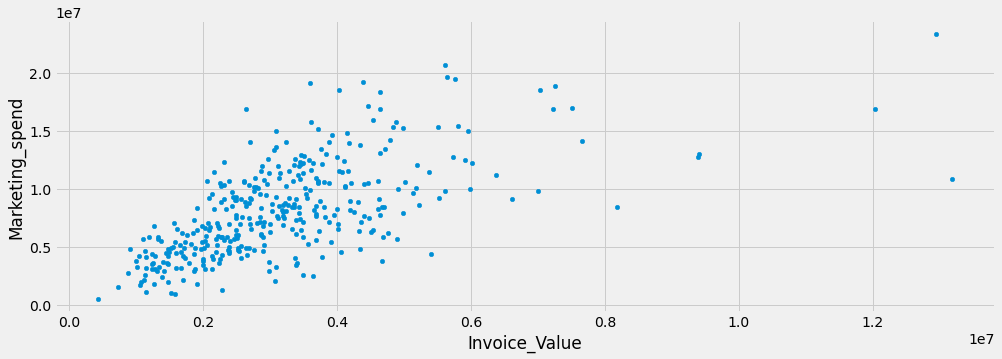

In [59]:
ms_r.plot(kind='scatter',x='Invoice_Value',y='Marketing_spend',figsize=(15,5))
#Marketing Spend and Invoice Value[Revenue] have a moderate Linear Relatioship...
#so we can say that the marketing spend moderately impacts Revenue!

#### i] Which product was appeared in the Transactions? [Which product appeared more frequently?]

In [333]:
#Product wise Unique Transaction count!
unique_trans=pd.DataFrame(df1.groupby('Product_Category')['Transaction_ID'].nunique())

In [334]:
#Product wise Total Transaction count!
total_trans=pd.pivot_table(data=df1,index='Product_Category',values='Transaction_ID',aggfunc='count')

In [337]:
prod_trans=pd.concat([unique_trans,total_trans],axis=1)
prod_trans.columns=['Unique','Total']

In [340]:
prod_trans['Basket_Penetration']=prod_trans.Unique/prod_trans.Total*100

In [342]:
prod_trans.sort_values(by='Basket_Penetration',ascending=False)
#Android and Housewares have the highest % of Basket Penetration in terms of Transactions!

,Unique,Total,Basket_Penetration
Product_Category,,,
Android,43,516,8.333333
Housewares,122,1464,8.333333
Gift Cards,157,1908,8.228512
Bottles,258,3216,8.022388
Nest,1974,26376,7.484076
Headgear,674,9252,7.284911
Nest-USA,11626,168156,6.913818
Notebooks & Journals,620,8988,6.898086
Bags,1545,22584,6.841126


#### j] Which product was purchased mostly based on quantity?

In [344]:
pd.pivot_table(data=df1,index='Product_Category',values='Quantity',aggfunc='sum').sort_values(by='Quantity',ascending=False)
#Office Products are mostly Purchased based on Quantity!

,Quantity
Product_Category,
Office,1060596
Apparel,389256
Drinkware,366012
Lifestyle,298572
Nest-USA,257160
Bags,183276
Notebooks & Journals,114672
Headgear,42396
Nest,34044


### 3. Performing Customer Segmentation

#### a] Heuristic(Value based,RFM) - Divide the customers into Premium, Gold, Silver, Standard Customers and Define strategy on the same.

In [20]:
#Copying the data for Value Based Segmentation!
df_value=df_final.copy()

In [29]:
#Value Based Segmentation!
np.quantile(df_final.Invoice_Value,0.25)

194.8155

In [30]:
np.quantile(df_final.Invoice_Value,0.5)

630.5937999999999

In [31]:
np.quantile(df_final.Invoice_Value,0.75)

2481.1000000000004

In [34]:
df_value['Value_based_segments']=np.where(df_final.Invoice_Value<194.8, 'Standard', np.where(df_final.Invoice_Value<630.59,'Silver', 
                                                            np.where(df_final.Invoice_Value<2481,'Gold','Premium') ))

In [152]:
#Value Based Profiling!
df_value.groupby('Value_based_segments')[['Quantity','Avg_Price','Delivery_Charges','Tenure_Months','Discount_pct','Invoice_Value']].agg(np.mean)

,Quantity,Avg_Price,Delivery_Charges,Tenure_Months,Discount_pct,Invoice_Value
Value_based_segments,,,,,,
Gold,4.909745,66.331599,11.373662,26.075969,18.406888,1349.095928
Premium,9.062793,122.217674,10.815103,26.095679,24.108324,5569.821301
Silver,2.508232,14.585627,10.248385,26.200264,21.067890,376.659124
Standard,1.493552,6.209076,9.472737,26.189658,16.386068,96.597357


##### RFM Segmentation

In [24]:
#Last Date of Transaction!
last_date_transaction=df_value.Transaction_Date.max()

In [22]:
#Last date of Transaction Per Customer!
last_transaction_cust=df_value.groupby('CustomerID')['Transaction_Date'].max()

In [25]:
#Recency Calculation!
recency1=last_date_transaction-last_transaction_cust

In [26]:
recency=(recency1 / np.timedelta64(1, 'D')).astype(int)

In [27]:
rfm=df_value.groupby(['CustomerID']).agg({'Transaction_ID': 'count','Invoice_Value': 'sum'}).round(1).join(recency)

In [28]:
rfm.columns=['frequency','monetary','recency']

In [29]:
rfm

,frequency,monetary,recency
CustomerID,,,
12346,24,6336.9,107
12347,708,3612323.4,59
12348,276,372858.5,73
12350,204,342365.6,17
12356,432,355834.5,107
...,...,...,...
18259,72,127793.4,270
18260,468,582010.5,87
18269,96,26647.7,194


In [30]:
quantiles =rfm[['frequency','monetary','recency' ]].quantile(q=[0.25,0.50,0.75])
quantiles

,frequency,monetary,recency
0.25,120.0,164764.975,55.0
0.50,252.0,437285.250,131.0
0.75,540.0,991470.275,220.0


In [31]:
#Recency Segment!
rfm['r_seg'] = np.where(rfm.recency<=55, 'Active_cust', np.where(rfm.recency<=131, 'Moderate_Active',
                                                                np.where(rfm.recency<=220,'At_Risk','Churn')))

In [32]:
#Monetary Segment!
rfm['m_seg'] = np.where(rfm.monetary<=164764.97, 1, np.where(rfm.monetary<=437285.25,2, 
                                                             np.where(rfm.monetary<=991470.27,3,4)))

In [33]:
#Frequency Segment!
rfm['f_seg'] = np.where(rfm.frequency<=120, 1, np.where(rfm.frequency<=252, 2,np.where(rfm.frequency<=540,3,4)))

In [34]:
rfm

,frequency,monetary,recency,r_seg,m_seg,f_seg
CustomerID,,,,,,
12346,24,6336.9,107,Moderate_Active,1,1
12347,708,3612323.4,59,Moderate_Active,4,4
12348,276,372858.5,73,Moderate_Active,2,3
12350,204,342365.6,17,Active_cust,2,2
12356,432,355834.5,107,Moderate_Active,2,3
...,...,...,...,...,...,...
18259,72,127793.4,270,Churn,1,1
18260,468,582010.5,87,Moderate_Active,3,3
18269,96,26647.7,194,At_Risk,1,1


In [35]:
rfm['fm_seg'] = np.where(((rfm.f_seg == 3) & (rfm.m_seg ==3)) , 'Premium',
                          np.where((((rfm.f_seg == 3) & (rfm.m_seg ==2)) | ((rfm.f_seg == 2) & (rfm.m_seg ==3))) , 'Gold',
                          np.where((((rfm.f_seg == 1) & (rfm.m_seg ==3)) | ((rfm.f_seg == 3) & (rfm.m_seg ==1)) | ((rfm.f_seg == 2) & (rfm.m_seg ==2))), 'Silver', 'Standard' )))

In [36]:
rfm[['recency', 'monetary', 'frequency','r_seg', 'fm_seg']].groupby(['r_seg', 'fm_seg']).mean().round(3)

recency     monetary  frequency
r_seg           fm_seg                                   
Active_cust     Gold       26.386   534927.555    227.455
                Premium    25.714   711918.262    367.048
                Silver     25.250   302574.938    180.600
                Standard   25.324  1788587.583    843.946
At_Risk         Gold      177.372   398574.877    298.326
                Premium   172.727   631501.082    384.545
                Silver    174.847   292877.229    184.068
                Standard  170.753   551230.174    375.126
Churn           Gold      291.103   442992.023    255.077
                Premium   274.683   699604.671    390.146
                Silver    288.448   296908.726    183.103
                Standard  290.263   565539.996    296.789
Moderate_Active Gold       93.933   416075.420    287.200
                Premium    95.167   691856.470    404.545
                Silver     91.870   299682.026    180.667
                Standard   92.649  1099454.463    594.649

In [37]:
#Priority-1!
rfm[((rfm.r_seg=='Active_cust') & (rfm.fm_seg=='Premium'))]

,frequency,monetary,recency,r_seg,m_seg,f_seg,fm_seg
CustomerID,,,,,,,
12410,312,575797.3,10,Active_cust,3,3,Premium
12476,324,791049.1,33,Active_cust,3,3,Premium
12559,264,695769.3,20,Active_cust,3,3,Premium
12662,396,737073.9,12,Active_cust,3,3,Premium
12709,396,759135.8,53,Active_cust,3,3,Premium
...,...,...,...,...,...,...,...
17685,492,838856.4,4,Active_cust,3,3,Premium
18016,444,699501.5,40,Active_cust,3,3,Premium
18075,432,722982.9,45,Active_cust,3,3,Premium


In [38]:
#Priority-2!
rfm[((rfm.r_seg=='Active_cust') & (rfm.fm_seg=='Gold'))]

,frequency,monetary,recency,r_seg,m_seg,f_seg,fm_seg
CustomerID,,,,,,,
12437,216,606569.1,17,Active_cust,3,2,Gold
12645,192,606166.8,51,Active_cust,3,2,Gold
12842,168,686687.7,8,Active_cust,3,2,Gold
12956,228,744465.2,0,Active_cust,3,2,Gold
13199,192,481017.2,18,Active_cust,3,2,Gold
13328,204,580813.9,48,Active_cust,3,2,Gold
13396,192,582001.2,34,Active_cust,3,2,Gold
13600,228,680547.1,29,Active_cust,3,2,Gold
13802,264,300325.8,25,Active_cust,2,3,Gold


In [39]:
#Priorty-3!
rfm[((rfm.r_seg=='Active_cust') & (rfm.fm_seg=='Silver'))]

,frequency,monetary,recency,r_seg,m_seg,f_seg,fm_seg
CustomerID,,,,,,,
12350,204,342365.6,17,Active_cust,2,2,Silver
12468,144,341910.2,51,Active_cust,2,2,Silver
12574,132,403636.0,45,Active_cust,2,2,Silver
12600,180,196952.6,15,Active_cust,2,2,Silver
12676,144,337259.8,21,Active_cust,2,2,Silver
12775,156,343139.9,13,Active_cust,2,2,Silver
12997,216,201733.7,40,Active_cust,2,2,Silver
13110,240,240751.5,21,Active_cust,2,2,Silver
13324,120,497571.4,34,Active_cust,3,1,Silver


In [40]:
#Priority-4!
rfm[((rfm.r_seg=='Active_cust') & (rfm.fm_seg=='Standard'))]

,frequency,monetary,recency,r_seg,m_seg,f_seg,fm_seg
CustomerID,,,,,,,
12373,168,118913.5,24,Active_cust,1,2,Standard
12377,912,2437936.4,40,Active_cust,4,4,Standard
12414,84,150430.9,17,Active_cust,1,1,Standard
12431,528,1402948.6,40,Active_cust,4,3,Standard
12464,72,308541.6,13,Active_cust,2,1,Standard
...,...,...,...,...,...,...,...
18125,984,2670973.7,48,Active_cust,4,4,Standard
18145,504,1010493.7,33,Active_cust,4,3,Standard
18202,276,1184471.5,23,Active_cust,4,3,Standard


#### b] Scientific(Using K-Means) & Understand the profiles.Define strategy for each Segment.

In [65]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [83]:
df_k=create_dummies(df_final,['Product_Category','Coupon_Status','Gender','Location'])

In [90]:
df_k.drop(['CustomerID','Transaction_Date','Product_SKU','year_month','Transaction_ID','Month','Coupon_Code',                            
           'Product_Description'],axis=1,inplace=True)

In [91]:
df_k.apply(lambda  x: x.std()/x.mean())
#No need to drop any Variables as every variable is having Co-Efficient of Variance!

Quantity                                  4.479787
Avg_Price                                 1.223674
Delivery_Charges                          1.846247
Tenure_Months                             0.515424
GST                                       0.333724
Discount_pct                              0.408249
Invoice_Value                             2.056996
Product_Category_Android                 34.935516
Product_Category_Apparel                  1.377577
Product_Category_Bags                     5.187355
Product_Category_Bottles                 13.963717
Product_Category_Drinkware                3.752349
Product_Category_Gift Cards              18.147731
Product_Category_Headgear                 8.192962
Product_Category_Housewares              20.724991
Product_Category_Lifestyle                3.998386
Product_Category_Nest                     4.785008
Product_Category_Nest-Canada             12.833204
Product_Category_Nest-USA                 1.657781
Product_Category_Notebooks & Jo

In [94]:
df_k.corr().to_excel('df_k_corr.xlsx')
#As checked in excel there are no variables which are highly Co-Related!

In [97]:
#Standardize the data!
sc = StandardScaler()
df_k_scaled = sc.fit_transform(df_k)

In [101]:
df_k_scaled1=pd.DataFrame(df_k_scaled,columns=df_k.columns)
df_k_scaled1

,Quantity,Avg_Price,Delivery_Charges,Tenure_Months,GST,Discount_pct,Invoice_Value,Product_Category_Android,Product_Category_Apparel,Product_Category_Bags,...,Product_Category_Notebooks & Journals,Product_Category_Office,Product_Category_Waze,Coupon_Status_Not Used,Coupon_Status_Used,Gender_M,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC
0,-0.173621,1.578665,-0.20560,-1.049507,-0.816167,-1.224745,-0.088917,-0.028624,-0.725913,-0.192777,...,-0.120277,-0.376235,-0.103247,-0.424697,1.398012,1.287828,1.370987,-0.304992,-0.51756,-0.233198
1,-0.173621,1.578665,-0.20560,-1.049507,-0.816167,0.000000,0.354343,-0.028624,-0.725913,-0.192777,...,-0.120277,-0.376235,-0.103247,-0.424697,1.398012,1.287828,1.370987,-0.304992,-0.51756,-0.233198
2,-0.173621,1.578665,-0.20560,-1.049507,-0.816167,1.224745,0.797602,-0.028624,-0.725913,-0.192777,...,-0.120277,-0.376235,-0.103247,-0.424697,1.398012,1.287828,1.370987,-0.304992,-0.51756,-0.233198
3,-0.173621,1.578665,-0.20560,-1.049507,-0.816167,-1.224745,-0.088917,-0.028624,-0.725913,-0.192777,...,-0.120277,-0.376235,-0.103247,-0.424697,1.398012,1.287828,1.370987,-0.304992,-0.51756,-0.233198
4,-0.173621,1.578665,-0.20560,-1.049507,-0.816167,0.000000,0.354343,-0.028624,-0.725913,-0.192777,...,-0.120277,-0.376235,-0.103247,-0.424697,1.398012,1.287828,1.370987,-0.304992,-0.51756,-0.233198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,-0.173621,3.154667,-0.54164,0.063800,-1.906328,0.000000,0.846576,-0.028624,-0.725913,-0.192777,...,-0.120277,-0.376235,-0.103247,-0.424697,1.398012,-0.776501,-0.729402,3.278770,-0.51756,-0.233198
630284,-0.173621,3.154667,-0.54164,0.063800,-1.906328,1.224745,1.548009,-0.028624,-0.725913,-0.192777,...,-0.120277,-0.376235,-0.103247,-0.424697,1.398012,-0.776501,-0.729402,3.278770,-0.51756,-0.233198
630285,-0.173621,3.154667,-0.54164,0.063800,-1.906328,-1.224745,0.145143,-0.028624,-0.725913,-0.192777,...,-0.120277,-0.376235,-0.103247,-0.424697,1.398012,-0.776501,-0.729402,3.278770,-0.51756,-0.233198
630286,-0.173621,3.154667,-0.54164,0.063800,-1.906328,0.000000,0.846576,-0.028624,-0.725913,-0.192777,...,-0.120277,-0.376235,-0.103247,-0.424697,1.398012,-0.776501,-0.729402,3.278770,-0.51756,-0.233198


##### PCA

In [110]:
#Taking all the Components Initially!
pca_model = PCA(n_components = 28)

In [111]:
pca_model1 = pca_model.fit(df_k_scaled1)

In [113]:
#Cumulative variance explained
var = np.round( np.cumsum( pca_model1.explained_variance_ratio_) * 100, 2 )
var

array([ 10.45,  16.28,  21.23,  26.04,  30.53,  34.64,  38.64,  42.55,
        46.41,  50.09,  53.74,  57.33,  60.9 ,  64.41,  67.89,  71.36,
        74.83,  78.29,  81.74,  85.12,  88.44,  91.63,  94.59,  96.99,
        98.38,  99.56,  99.98, 100.  ])

In [114]:
pd.DataFrame({'Eigen_Values': pca_model1.explained_variance_, 
                  'VAR': np.round(pca_model1.explained_variance_ratio_*100, 2), 
                      'Cumm_VAR': var}, index = range(1, 29))
#Eighen Values shouldn't go below 0.8 and Cummulative Variance shouldn't go below 75%!
#So we can considern 18 components!

,Eigen_Values,VAR,Cumm_VAR
1,3.029200,10.45,10.45
2,1.691067,5.83,16.28
3,1.436003,4.95,21.23
4,1.394453,4.81,26.04
5,1.304437,4.50,30.53
6,1.191587,4.11,34.64
7,1.160131,4.00,38.64
8,1.131497,3.90,42.55
9,1.121243,3.87,46.41
10,1.066439,3.68,50.09


In [115]:
#FinaL Components based on Eighen Values not below 0.8 and Cummulative_Var Greater than 75%!
pca_final = PCA(n_components = 18).fit(df_k_scaled1)

In [117]:
pcs = pd.DataFrame(pca_final.transform(df_k_scaled1), 
                   columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10','P11',
                             'P12','P13','P14','P15','P16','P17','P18'])

In [118]:
pcs

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,P11,P12,P13,P14,P15,P16,P17,P18
0,2.087375,-0.920283,-0.041564,-1.360092,-1.497214,-0.950026,0.032002,-0.387846,0.584619,0.006569,-0.077745,-0.090946,1.101708,0.105274,0.043669,0.070752,0.192714,-0.050827
1,2.260015,-0.781639,0.486366,-1.171991,-1.508277,-0.676354,0.158499,-0.383876,0.774580,0.080350,0.117983,-0.104233,0.362800,0.290299,-0.069722,0.130225,-0.026234,-0.087868
2,2.432655,-0.642995,1.014297,-0.983889,-1.519340,-0.402683,0.284995,-0.379907,0.964542,0.154132,0.313711,-0.117520,-0.376107,0.475324,-0.183112,0.189697,-0.245183,-0.124910
3,2.087375,-0.920283,-0.041564,-1.360092,-1.497214,-0.950026,0.032002,-0.387846,0.584619,0.006569,-0.077745,-0.090946,1.101708,0.105274,0.043669,0.070752,0.192714,-0.050827
4,2.260015,-0.781639,0.486366,-1.171991,-1.508277,-0.676354,0.158499,-0.383876,0.774580,0.080350,0.117983,-0.104233,0.362800,0.290299,-0.069722,0.130225,-0.026234,-0.087868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,3.532051,-0.681713,-1.284198,-0.585717,-1.281197,1.444015,0.858821,5.416841,-1.802216,0.482788,1.588745,0.008170,-2.090561,5.366577,4.024566,4.454988,4.034711,-9.005671
630284,3.782882,-0.499177,-0.624358,-0.353283,-1.294477,1.757247,1.001250,5.421238,-1.593134,0.560984,1.794942,-0.005620,-2.853890,5.554888,3.910109,4.514875,3.814751,-9.042840
630285,3.281220,-0.864249,-1.944037,-0.818151,-1.267917,1.130783,0.716391,5.412444,-2.011298,0.404592,1.382549,0.021960,-1.327233,5.178266,4.139022,4.395102,4.254671,-8.968502
630286,3.532051,-0.681713,-1.284198,-0.585717,-1.281197,1.444015,0.858821,5.416841,-1.802216,0.482788,1.588745,0.008170,-2.090561,5.366577,4.024566,4.454988,4.034711,-9.005671


In [131]:
#Taking Sample For calculating SC-Score and Best value of K!
pcs_sample=pcs.sample(frac=.25)
pcs_sample

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,P11,P12,P13,P14,P15,P16,P17,P18
579319,0.878080,1.381200,-2.564875,-1.848778,-1.275222,0.438326,0.562910,-0.419075,-0.091832,-0.149713,4.257190,2.155984,-3.656575,-2.376885,0.723918,-0.718002,2.051789,-0.437991
316972,-1.603781,-0.869637,-0.401732,1.724730,0.298645,0.412988,0.810646,-1.068214,0.208508,0.065802,0.024615,-0.096493,0.107931,0.258742,0.014976,0.171554,-0.002091,-0.167490
346035,-1.731173,-0.868696,-0.808690,1.680861,0.348575,0.158118,1.426551,-0.242471,-0.011152,-0.016692,-0.279466,-0.191485,0.777911,-0.037454,0.233044,0.115909,0.276929,-0.031464
281259,-1.578158,-0.841927,-0.719762,1.775480,0.351727,0.131587,1.603038,-0.215573,-0.062333,0.077955,-0.249457,-0.243079,0.983685,0.157025,0.314991,0.190904,0.325961,-0.108987
378241,-1.703406,-0.854074,-0.031396,0.844583,-1.201537,1.053227,-2.208877,-1.136454,0.663299,0.141774,0.178267,-0.007405,0.117592,0.803680,0.870599,0.855877,0.313093,-0.880259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551982,-1.484283,0.258129,0.188465,-1.623546,-1.578330,-2.021488,-1.091835,-0.686617,-1.255346,2.619082,0.258553,-1.206349,-0.088110,-1.067851,-0.194902,-0.281161,-0.139144,0.083308
307348,-1.579444,-0.851711,0.160486,0.168808,0.184485,0.849304,-0.389517,-0.556631,0.288097,0.020869,0.123487,0.002897,0.100331,0.014728,-0.051948,0.020631,-0.014286,-0.069624
346665,-1.669074,-0.845263,0.218411,-1.445177,0.024994,0.633597,0.030345,-0.714964,0.205613,-0.034231,-0.082062,-0.052834,0.788022,-0.192356,0.003715,-0.066280,0.160543,0.019365
201170,2.665061,24.389361,17.282644,8.421021,-1.322063,5.852619,1.299626,0.434365,3.124445,0.817773,-2.920917,-1.679628,0.704804,-1.542174,0.114503,1.311363,2.062967,1.284694


In [134]:
#Calculating SC-Score to get best value of K!
k_range = range(3,10)
for k in k_range:
    km = KMeans(n_clusters = k, random_state = 123).fit(pcs_sample)
    print('Number of Clusters',km.n_clusters)
    print('SC-Scores',( metrics.silhouette_score(pcs_sample, km.labels_)))

Number of Clusters 3
SC-Scores 0.21643575152312267
Number of Clusters 4
SC-Scores 0.2264825347639953
Number of Clusters 5
SC-Scores 0.2552603527896765
Number of Clusters 6
SC-Scores 0.2899483582941695
Number of Clusters 7
SC-Scores 0.2818642430512288
Number of Clusters 8
SC-Scores 0.31908025875534257
Number of Clusters 9
SC-Scores 0.3451694163754191


In [136]:
#Fitting Clusters 4 to 10 to get best Segment!
km4 = KMeans(n_clusters=4, random_state=123).fit(pcs)
km5 = KMeans(n_clusters=5, random_state=123).fit(pcs)
km6 = KMeans(n_clusters=6, random_state=123).fit(pcs)
km7 = KMeans(n_clusters=7, random_state=123).fit(pcs)
km8 = KMeans(n_clusters=8, random_state=123).fit(pcs)
km9 = KMeans(n_clusters=9, random_state=123).fit(pcs)
km10 = KMeans(n_clusters=10, random_state=123).fit(pcs)

In [137]:
#Labelling all the Segment Clusters!
df_k['clust4'] = km4.labels_
df_k['clust5'] = km5.labels_
df_k['clust6'] = km6.labels_
df_k['clust7'] = km7.labels_
df_k['clust8'] = km8.labels_
df_k['clust9'] = km9.labels_
df_k['clust10'] = km10.labels_

In [139]:
#Segment_Distribution!
seg_dist = pd.concat([pd.Series(df_k.clust4.count())/df_k.clust4.count(),
           df_k.clust4.value_counts().sort_index()/sum(df_k.clust4.value_counts()),           
           df_k.clust5.value_counts().sort_index()/sum(df_k.clust5.value_counts()),
           df_k.clust6.value_counts().sort_index()/sum(df_k.clust6.value_counts()),
           df_k.clust7.value_counts().sort_index()/sum(df_k.clust7.value_counts()),
           df_k.clust8.value_counts().sort_index()/sum(df_k.clust8.value_counts()),
           df_k.clust9.value_counts().sort_index()/sum(df_k.clust9.value_counts()),
           df_k.clust10.value_counts().sort_index()/sum(df_k.clust10.value_counts())])

In [140]:
seg_dist

0    1.000000
0    0.041860
1    0.519248
2    0.274630
3    0.164261
0    0.058862
1    0.274662
2    0.460482
3    0.041860
4    0.164134
0    0.419592
1    0.161932
2    0.041860
3    0.274490
4    0.035831
5    0.066294
0    0.288459
1    0.396847
2    0.058875
3    0.066351
4    0.141554
5    0.006035
6    0.041879
0    0.268385
1    0.066294
2    0.409222
3    0.035831
4    0.160980
5    0.041886
6    0.006035
7    0.011366
0    0.011385
1    0.124483
2    0.394747
3    0.041867
4    0.058849
5    0.066294
6    0.267586
7    0.029688
8    0.005102
0    0.425082
1    0.284695
2    0.125593
3    0.014628
4    0.035831
5    0.058849
6    0.041860
7    0.006035
8    0.005102
9    0.002323
dtype: float64

In [148]:
#Aggregating by each cluster the mean of all variables!
agg = pd.concat([df_k.apply(np.mean).T,
           df_k.groupby('clust4').apply(np.mean).T,
           df_k.groupby('clust5').apply(np.mean).T,
           df_k.groupby('clust6').apply(np.mean).T,
           df_k.groupby('clust7').apply(np.mean).T,
           df_k.groupby('clust8').apply(np.mean).T,
           df_k.groupby('clust9').apply(np.mean).T,
           df_k.groupby('clust10').apply(np.mean).T], axis=1)

In [149]:
agg

,0,0,1,2,3,0,1,2,3,4,...,0,1,2,3,4,5,6,7,8,9
Quantity,4.500171,1.486052,3.357802,1.978232,13.095893,7.966900,1.983410,2.887044,1.486052,12.762827,...,2.580015,2.318212,14.311521,2.570933,8.115303,7.806859,1.486052,1.479495,7.798507,20.360656
Avg_Price,52.429089,194.167077,17.154359,125.129449,6.267671,3.860116,125.122261,18.844382,194.167077,6.276609,...,17.920183,118.363949,3.872128,15.881193,29.830797,3.860194,194.167077,157.243249,3.437201,2.060574
Delivery_Charges,10.476922,7.316692,10.807043,7.176897,15.756063,13.984041,7.177320,10.453005,7.316692,15.613804,...,10.343749,7.561024,15.979100,9.692460,13.626488,13.985655,7.316692,9.157571,13.078246,16.860738
Tenure_Months,26.140393,26.772286,26.125203,26.028447,26.214542,25.800431,26.029252,26.168070,26.772286,26.209488,...,26.156656,25.971489,26.375796,26.406941,26.271520,25.796506,26.772286,26.432177,25.026119,26.450820
GST,0.137433,0.050000,0.179370,0.100027,0.089687,0.180000,0.100021,0.179308,0.050000,0.089594,...,0.179234,0.097156,0.100163,0.050000,0.180000,0.180000,0.050000,0.100000,0.050000,0.120000
Discount_pct,20.000000,20.003032,19.992911,20.020567,19.987250,19.998922,20.021026,19.992558,20.003032,19.985307,...,19.992684,20.014935,19.990399,19.995662,20.000000,20.000000,20.003032,20.000000,20.000000,20.000000
Invoice_Value,1854.401371,4786.968633,736.192868,4022.417548,1017.124234,516.818890,4022.065651,770.656474,4786.968633,999.278898,...,707.187649,3866.277578,917.939849,743.022805,1789.025938,507.578800,4786.968633,4666.007603,502.442950,792.039505
Product_Category_Android,0.000819,0.000000,0.000000,0.000000,0.004984,0.000000,0.000000,0.000000,0.000000,0.004988,...,0.000000,0.000000,0.006518,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Product_Category_Apparel,0.345099,0.000000,0.663709,0.001594,0.000193,0.000000,0.001525,0.748453,0.000000,0.000193,...,0.810767,0.001494,0.000253,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Product_Category_Bags,0.035831,0.000000,0.068383,0.000508,0.001120,0.000000,0.000508,0.077110,0.000000,0.001121,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [150]:
profiling = pd.concat([pd.DataFrame(seg_dist).T, agg],axis=0)

In [154]:
profiling.columns = ['overall',
                    'KM4_1', 'KM4_2', 'KM4_3','KM4_4',
                    'KM5_1', 'KM5_2', 'KM5_3','KM5_4','KM5_5',
                    'KM6_1', 'KM6_2', 'KM6_3','KM6_4', 'KM6_5','KM6_6',
                    'KM7_1', 'KM7_2', 'KM7_3','KM7_4', 'KM7_5', 'KM7_6','KM7_7',
                    'KM8_1', 'KM8_2', 'KM8_3','KM8_4', 'KM8_5', 'KM8_6','KM8_7','KM8_8',
                    'KM9_1', 'KM9_2', 'KM9_3','KM9_4', 'KM9_5', 'KM9_6', 'KM9_7', 'KM9_8','KM9_9',
                    'KM10_1', 'KM10_2', 'KM10_3','KM10_4', 'KM10_5', 'KM10_6', 'KM10_7', 'KM10_8','KM10_9','KM10_10']

In [155]:
profiling.to_csv('profiling.csv')

,overall,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,KM5_3,KM5_4,KM5_5,...,KM10_1,KM10_2,KM10_3,KM10_4,KM10_5,KM10_6,KM10_7,KM10_8,KM10_9,KM10_10
0,1.000000,0.041860,0.519248,0.274630,0.164261,0.058862,0.274662,0.460482,0.041860,0.164134,...,0.425082,0.284695,0.125593,0.014628,0.035831,0.058849,0.041860,0.006035,0.005102,0.002323
Quantity,4.500171,1.486052,3.357802,1.978232,13.095893,7.966900,1.983410,2.887044,1.486052,12.762827,...,2.580015,2.318212,14.311521,2.570933,8.115303,7.806859,1.486052,1.479495,7.798507,20.360656
Avg_Price,52.429089,194.167077,17.154359,125.129449,6.267671,3.860116,125.122261,18.844382,194.167077,6.276609,...,17.920183,118.363949,3.872128,15.881193,29.830797,3.860194,194.167077,157.243249,3.437201,2.060574
Delivery_Charges,10.476922,7.316692,10.807043,7.176897,15.756063,13.984041,7.177320,10.453005,7.316692,15.613804,...,10.343749,7.561024,15.979100,9.692460,13.626488,13.985655,7.316692,9.157571,13.078246,16.860738
Tenure_Months,26.140393,26.772286,26.125203,26.028447,26.214542,25.800431,26.029252,26.168070,26.772286,26.209488,...,26.156656,25.971489,26.375796,26.406941,26.271520,25.796506,26.772286,26.432177,25.026119,26.450820
GST,0.137433,0.050000,0.179370,0.100027,0.089687,0.180000,0.100021,0.179308,0.050000,0.089594,...,0.179234,0.097156,0.100163,0.050000,0.180000,0.180000,0.050000,0.100000,0.050000,0.120000
Discount_pct,20.000000,20.003032,19.992911,20.020567,19.987250,19.998922,20.021026,19.992558,20.003032,19.985307,...,19.992684,20.014935,19.990399,19.995662,20.000000,20.000000,20.003032,20.000000,20.000000,20.000000
Invoice_Value,1854.401371,4786.968633,736.192868,4022.417548,1017.124234,516.818890,4022.065651,770.656474,4786.968633,999.278898,...,707.187649,3866.277578,917.939849,743.022805,1789.025938,507.578800,4786.968633,4666.007603,502.442950,792.039505
Product_Category_Android,0.000819,0.000000,0.000000,0.000000,0.004984,0.000000,0.000000,0.000000,0.000000,0.004988,...,0.000000,0.000000,0.006518,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Product_Category_Apparel,0.345099,0.000000,0.663709,0.001594,0.000193,0.000000,0.001525,0.748453,0.000000,0.000193,...,0.810767,0.001494,0.000253,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 4. Predicting Customer Lifetime Value(Low Value/Medium Value/High Value)

#### a]First Define Dependent  Variable using low value, medium value, high value using Customer Revenue.

In [65]:
#Understanding the Low, Medium and High Revenue!
df_final.Invoice_Value.quantile(q=[0.33,0.67])

0.33     298.6878
0.67    1508.2238
Name: Invoice_Value, dtype: float64

In [46]:
clv=df_final.copy()

In [71]:
clv['LMH']=np.where(df_final.Invoice_Value<=298, 'low_value', 
                    np.where(df_final.Invoice_Value<=1508,'medium_value','high_value'))

<AxesSubplot:>

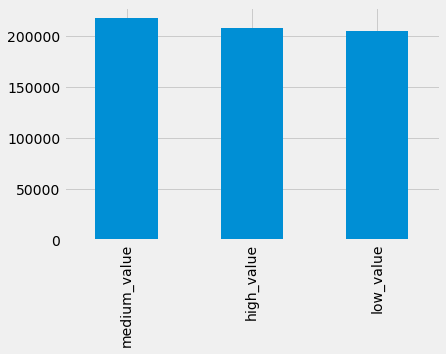

In [72]:
clv.LMH.value_counts().plot(kind='bar')
#Balanced Proportion of Low, Medium, High for Mutinomial-Classification!

In [73]:
#Assigning the Dependent Variable to Numeric Value!
dim={'low_value':0,'medium_value':1,'high_value':2}

In [74]:
clv['m_lmh']=clv['LMH'].map(dim)

0         2
1         2
2         2
3         2
4         2
         ..
630283    2
630284    2
630285    2
630286    2
630287    2
Name: LMH, Length: 630288, dtype: int64

#### b]Performing Classification Model.

In [82]:
#Nominal columns for Getting Dummy Variables!
nomcol=['Product_Category','Coupon_Status','Location','Coupon_Code','Gender']

In [84]:
clv1=pd.get_dummies(clv,columns = nomcol, drop_first = True)

In [88]:
clv1.drop(['CustomerID','Transaction_ID','Transaction_Date','Product_SKU',
           'Product_Description','Month','year_month','LMH','Invoice_Value'],axis=1,inplace=True)

In [95]:
l = []
for i in clv1:
    if (len(clv1[i].unique()) == 1):
        l.append(i)
        print(i, clv1[i].unique())
        
print(l)
#No column having single Unique values!

[]


##### Features based on Co-Relation

In [150]:
clv1.corrwith(clv1['m_lmh']).abs().sort_values(ascending = False).head(11)

m_lmh                        1.000000
Avg_Price                    0.658967
Product_Category_Nest-USA    0.584929
GST                          0.409260
Coupon_Code_ELEC20           0.384064
Coupon_Code_ELEC30           0.384064
Coupon_Code_SALE10           0.316220
Discount_pct                 0.296012
Product_Category_Apparel     0.289385
Product_Category_Office      0.244812
Product_Category_Nest        0.224884
dtype: float64

In [152]:
imp_vars_cor=['Avg_Price',                   
'Product_Category_Nest-USA',   
'GST',                         
'Coupon_Code_ELEC20',         
'Coupon_Code_ELEC30',           
'Coupon_Code_SALE10',           
'Discount_pct',                
'Product_Category_Apparel',     
'Product_Category_Office',      
'Product_Category_Nest']

##### RFE

In [109]:
x=clv1[clv1.columns.difference(['m_lmh'])]

In [110]:
y=clv1.m_lmh

In [114]:
classifier=RandomForestClassifier()

In [116]:
rfe = RFE(classifier, n_features_to_select=10).fit(x,y)

In [144]:
imp_vars_RFE = list(x.columns[rfe.support_])

In [145]:
imp_vars_RFE

['Avg_Price',
 'Coupon_Code_ELEC10',
 'Coupon_Code_ELEC30',
 'Coupon_Code_SALE30',
 'Delivery_Charges',
 'Discount_pct',
 'GST',
 'Product_Category_Apparel',
 'Product_Category_Nest-USA',
 'Quantity']

##### SelectKBest

In [146]:
SKB = SelectKBest(f_classif, k=10).fit(x,y)

In [148]:
imp_vars_kbest = list(x.columns[SKB.get_support()])

In [149]:
imp_vars_kbest

['Avg_Price',
 'Coupon_Code_ELEC20',
 'Coupon_Code_ELEC30',
 'Coupon_Code_SALE10',
 'Coupon_Code_SALE30',
 'Discount_pct',
 'GST',
 'Product_Category_Apparel',
 'Product_Category_Nest-USA',
 'Product_Category_Office']

In [155]:
final_vars=list(set(imp_vars_cor + imp_vars_kbest + imp_vars_RFE))
final_vars

['Quantity',
 'Coupon_Code_ELEC30',
 'Coupon_Code_ELEC20',
 'Product_Category_Apparel',
 'Coupon_Code_SALE30',
 'Coupon_Code_SALE10',
 'Product_Category_Nest',
 'Avg_Price',
 'Discount_pct',
 'Delivery_Charges',
 'GST',
 'Product_Category_Nest-USA',
 'Product_Category_Office',
 'Coupon_Code_ELEC10']

In [158]:
#VIF
feature=final_vars
a=np.inf
while a>=5:
    vif=[variance_inflation_factor(clv1[feature].values,i) for i in range(clv1[feature].shape[1])]
    vif=pd.Series(vif,name='VIF')
    fet=pd.Series(clv1[feature].columns,name='Feature')
    vifdf=pd.concat([vif,fet],axis=1).sort_values(by="VIF")
    a=vifdf['VIF'].max()
    if a<=5:
        break
    feature=list(vifdf[:-1]["Feature"])
feature

['Quantity',
 'Product_Category_Office',
 'Delivery_Charges',
 'Coupon_Code_ELEC20',
 'Coupon_Code_SALE10',
 'Coupon_Code_SALE30',
 'Coupon_Code_ELEC30',
 'Product_Category_Nest',
 'GST',
 'Product_Category_Apparel',
 'Avg_Price']

In [183]:
#X vars after VIF!
x1=clv1[feature]

In [189]:
#Train and Test Split!
train_x,test_x,train_y,test_y=train_test_split(x1,y, test_size=0.3, random_state=123)

In [186]:
logreg =LogisticRegression()

In [191]:
logreg.fit(train_x,train_y)

LogisticRegression()

In [202]:
print(metrics.classification_report(train_y, logreg.predict(train_x)))
print(metrics.classification_report(test_y, logreg.predict(test_x)))
#From below Report we can say that the Model is Stable with 83% Accuracy!

              precision    recall  f1-score   support

           0       0.89      0.91      0.90    143178
           1       0.73      0.79      0.76    152444
           2       0.88      0.79      0.83    145579

    accuracy                           0.83    441201
   macro avg       0.83      0.83      0.83    441201
weighted avg       0.83      0.83      0.83    441201

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     61538
           1       0.73      0.79      0.76     65128
           2       0.88      0.78      0.83     62421

    accuracy                           0.83    189087
   macro avg       0.83      0.83      0.83    189087
weighted avg       0.83      0.83      0.83    189087



### 5. Cross-Selling(Which products are selling Together)

In [204]:
#Creating Function that find pairs and list them in a column!
def find_pairs(x):
    pairs=pd.DataFrame(list(permutations(x.values,2)),columns=['A','B'])
    return pairs

In [209]:
#Grouping the Produts by Transaction_ID and applying the function!
combo=on_sales.groupby('Transaction_ID')['Product_Category'].apply(find_pairs).reset_index(drop=True)

In [210]:
combo

,A,B
0,Apparel,Bags
1,Apparel,Bags
2,Apparel,Drinkware
3,Apparel,Drinkware
4,Apparel,Drinkware
...,...,...
177677,Nest-USA,Nest
177678,Nest-USA,Nest-USA
177679,Nest-USA,Nest
177680,Nest,Nest-USA


In [213]:
#Calculating how often each item_a occurs with item_b!
combo2=combo.groupby(['A','B']).size()
combo2

A            B                   
Accessories  Accessories              98
             Apparel                 287
             Backpacks                 1
             Bags                     39
             Bottles                   1
                                    ... 
Waze         Nest                      6
             Nest-USA                 70
             Notebooks & Journals     24
             Office                  377
             Waze                    308
Length: 289, dtype: int64

In [216]:
#Creating Dataframe with Frequent Combinations!
product_combo=combo2.reset_index()
product_combo.columns=['A','B','size']
product_combo.sort_values(by='size',ascending=False).head(15)

,A,B,size
28,Apparel,Apparel,53920
269,Office,Office,11008
255,Office,Apparel,7732
42,Apparel,Office,7732
231,Nest-USA,Nest-USA,5622
182,Lifestyle,Lifestyle,5202
32,Apparel,Drinkware,4518
94,Drinkware,Apparel,4518
37,Apparel,Lifestyle,4208
173,Lifestyle,Apparel,4208


### 6. Predicting Next Purchase Day(How soon each customer can visit the store(0-30 days,30-60 days,60-90 days,90+ days)

In [20]:
#Copying th Transaction Table!
df_pd=df_final.copy()

In [25]:
#Last date of Transaction of Each Customer!
last_transdate_cust=df_pd.groupby('CustomerID')['Transaction_Date'].max()

In [26]:
#First Date of Transaction of Each Customer!
first_transdate_cust=df_pd.groupby('CustomerID')['Transaction_Date'].min()

In [66]:
#Tenure Calculation!
tenure=(df_pd.groupby('CustomerID')['Transaction_Date'].max().values.astype('datetime64[D]')-df_pd.groupby('CustomerID')['Transaction_Date'].min().values.astype('datetime64[D]')).astype('int')

In [35]:
#Transaction per customer!
transaction_per_cust=df_pd.groupby('CustomerID')['Transaction_ID'].count()

In [69]:
#Average Days between the Transactions!
avg_days_per_trans=tenure/transaction_per_cust*100

In [81]:
purchase_date=pd.concat([transaction_per_cust,avg_days_per_trans],axis=1)
purchase_date.columns=['trans_per_cust','avg_days_per_trans']
purchase_date

,trans_per_cust,avg_days_per_trans
CustomerID,,
12346,24,0.000000
12347,708,31.497175
12348,276,43.115942
12350,204,0.000000
12356,432,0.000000
...,...,...
18259,72,0.000000
18260,468,22.435897
18269,96,79.166667


In [85]:
#Merging the Purchase Date for Classification Model!
df_pd1=pd.merge(left=df_pd,right=purchase_date,how='inner',on='CustomerID')
df_pd1

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Location,Tenure_Months,GST,Month,Coupon_Code,Discount_pct,Invoice_Value,year_month,trans_per_cust,avg_days_per_trans
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Chicago,12,0.10,Jan,ELEC10,10,1515.2290,2019-01,3516,0.711035
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Chicago,12,0.10,Feb,ELEC20,20,3206.0390,2019-01,3516,0.711035
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Chicago,12,0.10,Mar,ELEC30,30,4896.8490,2019-01,3516,0.711035
3,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Chicago,12,0.10,Apr,ELEC10,10,1515.2290,2019-01,3516,0.711035
4,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Chicago,12,0.10,May,ELEC20,20,3206.0390,2019-01,3516,0.711035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,16333,47144,2019-12-16,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,...,New York,41,0.05,Aug,NE20,20,4976.0125,2019-12,24,0.000000
630284,16333,47144,2019-12-16,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,...,New York,41,0.05,Sep,NE30,30,7598.3875,2019-12,24,0.000000
630285,16333,47144,2019-12-16,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,...,New York,41,0.05,Oct,NE10,10,2353.6375,2019-12,24,0.000000
630286,16333,47144,2019-12-16,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,...,New York,41,0.05,Nov,NE20,20,4976.0125,2019-12,24,0.000000


In [87]:
#Defining Purchase Bucket!
df_pd1['purchase_bucket']=np.where(df_pd1.avg_days_per_trans<=30, '0-30_days', np.where(df_pd1.avg_days_per_trans<=60,'30-60_days', 
                                                            np.where(df_pd1.avg_days_per_trans<=90,'60-90_days','90+_days')))

In [96]:
df_pd1['purchase_bucket'].value_counts()

0-30_days     538296
30-60_days     65568
60-90_days     15552
90+_days       10872
Name: purchase_bucket, dtype: int64

#### Mutinomial Classification Model

In [94]:
#Assigning the Dependent Variable to Numeric Value!
dim1={'0-30_days':0,'30-60_days':1,'60-90_days':2,'90+_days':3}

In [97]:
df_pd1['m_pb1']=df_pd1['purchase_bucket'].map(dim1)

In [100]:
df_pd1.m_pb1.value_counts()

0    538296
1     65568
2     15552
3     10872
Name: m_pb1, dtype: int64

In [101]:
nomcol=['Product_Category','Coupon_Status','Location','Coupon_Code','Gender']

In [102]:
df_pd1=pd.get_dummies(df_pd1,columns = nomcol, drop_first = True)

In [108]:
df_pd1.drop(['CustomerID','Transaction_ID','Transaction_Date','Product_SKU',
           'Product_Description','Month','year_month','purchase_bucket',
           'trans_per_cust','avg_days_per_trans'],axis=1,inplace=True)

In [109]:
l = []
for i in df_pd1:
    if (len(df_pd1[i].unique()) == 1):
        l.append(i)
        print(i, df_pd1[i].unique())
        
print(l)
#No column having single Unique values!

[]


##### Features Based on Co-Relation

In [112]:
df_pd1.corrwith(df_pd1['m_pb1']).abs().sort_values(ascending = False).head(11)
#All the Co-Relation values are Low!

m_pb1                          1.000000
Location_New Jersey            0.055733
Location_Chicago               0.047064
Location_New York              0.038481
Location_Washington DC         0.028230
Gender_M                       0.024079
Product_Category_Nest          0.014402
Avg_Price                      0.012387
GST                            0.010197
Product_Category_Gift Cards    0.009628
Product_Category_Bags          0.009485
dtype: float64

##### RFE

In [113]:
x1=df_pd1[df_pd1.columns.difference(['m_pb1'])]

In [116]:
y1=df_pd1.m_pb1

In [118]:
rfe = RFE(RandomForestClassifier(), n_features_to_select=10).fit(x1,y1)

In [119]:
imp_vars_RFE1 = list(x1.columns[rfe.support_])
imp_vars_RFE1

['Avg_Price',
 'Coupon_Status_Not Used',
 'Coupon_Status_Used',
 'Delivery_Charges',
 'Discount_pct',
 'GST',
 'Gender_M',
 'Invoice_Value',
 'Quantity',
 'Tenure_Months']

##### SelectKBest

In [120]:
SKB = SelectKBest(f_classif, k=10).fit(x1,y1)

In [121]:
imp_vars_kbest1 = list(x1.columns[SKB.get_support()])
imp_vars_kbest1

['Avg_Price',
 'Gender_M',
 'Location_Chicago',
 'Location_New Jersey',
 'Location_New York',
 'Location_Washington DC',
 'Product_Category_Gift Cards',
 'Product_Category_Nest',
 'Product_Category_Nest-Canada',
 'Tenure_Months']

In [122]:
final_vars1=list(set( imp_vars_kbest1 + imp_vars_RFE1))
final_vars1

['Location_New York',
 'Product_Category_Nest',
 'Product_Category_Nest-Canada',
 'Delivery_Charges',
 'Product_Category_Gift Cards',
 'Location_New Jersey',
 'Avg_Price',
 'Coupon_Status_Used',
 'Discount_pct',
 'Location_Chicago',
 'Gender_M',
 'Location_Washington DC',
 'Tenure_Months',
 'Quantity',
 'Coupon_Status_Not Used',
 'GST',
 'Invoice_Value']

In [123]:
#VIF
feature1=final_vars1
a=np.inf
while a>=5:
    vif=[variance_inflation_factor(df_pd1[feature1].values,i) for i in range(df_pd1[feature1].shape[1])]
    vif=pd.Series(vif,name='VIF')
    fet=pd.Series(df_pd1[feature1].columns,name='Feature')
    vifdf=pd.concat([vif,fet],axis=1).sort_values(by="VIF")
    a=vifdf['VIF'].max()
    if a<=5:
        break
    feature1=list(vifdf[:-1]["Feature"])
feature1

['Product_Category_Gift Cards',
 'Product_Category_Nest-Canada',
 'Location_Washington DC',
 'Location_New Jersey',
 'Coupon_Status_Not Used',
 'Delivery_Charges',
 'Product_Category_Nest',
 'Quantity',
 'Gender_M',
 'Location_New York',
 'Coupon_Status_Used',
 'Location_Chicago',
 'Invoice_Value',
 'Avg_Price',
 'Tenure_Months',
 'Discount_pct']

In [124]:
#X vars after VIF for training the model!
x_pd=df_pd1[feature1]

In [126]:
#Train and Test Split!
train_x_pd,test_x_pd,train_y_pd,test_y_pd=train_test_split(x_pd,y1, test_size=0.3, random_state=123)

In [127]:
logreg =LogisticRegression()

In [128]:
logreg.fit(train_x_pd,train_y_pd)

LogisticRegression()

In [131]:
print(metrics.classification_report(train_y_pd, logreg.predict(train_x_pd)))
print(metrics.classification_report(test_y_pd, logreg.predict(test_x_pd)))
#From below Report we can say that the Model is Stable with 85% Accuracy!

              precision    recall  f1-score   support

           0       0.85      1.00      0.92    376779
           1       0.29      0.00      0.00     45998
           2       0.00      0.00      0.00     10851
           3       0.00      0.00      0.00      7573

    accuracy                           0.85    441201
   macro avg       0.29      0.25      0.23    441201
weighted avg       0.76      0.85      0.79    441201

              precision    recall  f1-score   support

           0       0.85      1.00      0.92    161517
           1       0.35      0.00      0.00     19570
           2       0.00      0.00      0.00      4701
           3       0.00      0.00      0.00      3299

    accuracy                           0.85    189087
   macro avg       0.30      0.25      0.23    189087
weighted avg       0.77      0.85      0.79    189087



### 7. Perform Cohort Analysis by defining below Cohorts:

#### a]Customer who started in each month and understand their Behaviour

In [134]:
df_co=df_final.copy()

In [139]:
#Cohort analysis
def get_month(x):
    return dt.datetime(x.year,x.month,1)

In [140]:
#Applying the above UDF to get Month of each Transaction_Date!
df_co['Transaction_Date_co']=df_co.Transaction_Date.apply(get_month)

In [142]:
#Grouping Customers to know which month they Visited!
group=df_co.groupby('CustomerID')['Transaction_Date_co']

In [143]:
#Their First Purchase Month!
df_co['cohort_month']=group.transform('min')

In [146]:
#Function to extract on which months the Customers Came By!
def get_date_int(df_co,column):
    year=df_co[column].dt.year
    month=df_co[column].dt.month
    date=df_co[column].dt.date
    return year,month,date

In [147]:
trans_year,trans_month,trans_date=get_date_int(df_co,'Transaction_Date_co')

In [148]:
cohort_year,cohort_month,cohort_date=get_date_int(df_co,'cohort_month')

In [149]:
#Year_diff and Month_Diff for Cohort_Index!
year_diff=trans_year-cohort_year
month_diff=trans_month-cohort_month

In [150]:
#Cohort Index gives the difference between first purchase and all the purchases the customer made later!
df_co['cohort_index']=year_diff*12+month_diff+1

In [155]:
cohort_analysis=pd.pivot_table(data=df_co,index='cohort_month',
                         columns='cohort_index',values='CustomerID',aggfunc='nunique')
cohort_analysis
#In this analysis they say in each cohort month how many customers visited Intially and Cohort Index says how many retained..
# in the Next Month!

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
2019-01-01,215.0,13.0,24.0,34.0,23.0,44.0,35.0,47.0,23.0,28.0,20.0,34.0
2019-02-01,96.0,7.0,9.0,16.0,17.0,22.0,19.0,15.0,12.0,11.0,16.0,NaN
2019-03-01,177.0,18.0,35.0,25.0,32.0,33.0,22.0,22.0,15.0,19.0,NaN,NaN
2019-04-01,163.0,14.0,24.0,24.0,18.0,15.0,10.0,16.0,12.0,NaN,NaN,NaN
2019-05-01,112.0,12.0,9.0,13.0,10.0,13.0,14.0,8.0,NaN,NaN,NaN,NaN
2019-06-01,137.0,20.0,22.0,12.0,11.0,14.0,11.0,NaN,NaN,NaN,NaN,NaN
2019-07-01,93.0,12.0,4.0,5.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,136.0,14.0,16.0,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,78.0,6.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### b] Which Month Cohort Has Maximum Retention?

In [167]:
cohort_sizes=cohort_analysis.iloc[:,0]
cohort_sizes

cohort_month
2019-01-01    215.0
2019-02-01     96.0
2019-03-01    177.0
2019-04-01    163.0
2019-05-01    112.0
2019-06-01    137.0
2019-07-01     93.0
2019-08-01    136.0
2019-09-01     78.0
2019-10-01     87.0
2019-11-01     68.0
2019-12-01    106.0
Name: 1, dtype: float64

In [172]:
retention_co=cohort_analysis.divide(cohort_sizes,axis=0)*100
retention_co

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
2019-01-01,100.0,6.046512,11.162791,15.813953,10.697674,20.465116,16.279070,21.860465,10.697674,13.023256,9.302326,15.813953
2019-02-01,100.0,7.291667,9.375000,16.666667,17.708333,22.916667,19.791667,15.625000,12.500000,11.458333,16.666667,NaN
2019-03-01,100.0,10.169492,19.774011,14.124294,18.079096,18.644068,12.429379,12.429379,8.474576,10.734463,NaN,NaN
2019-04-01,100.0,8.588957,14.723926,14.723926,11.042945,9.202454,6.134969,9.815951,7.361963,NaN,NaN,NaN
2019-05-01,100.0,10.714286,8.035714,11.607143,8.928571,11.607143,12.500000,7.142857,NaN,NaN,NaN,NaN
2019-06-01,100.0,14.598540,16.058394,8.759124,8.029197,10.218978,8.029197,NaN,NaN,NaN,NaN,NaN
2019-07-01,100.0,12.903226,4.301075,5.376344,10.752688,8.602151,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,100.0,10.294118,11.764706,8.088235,6.617647,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,100.0,7.692308,3.846154,2.564103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
